# Cell-cell communication using CellPhoneDBViz

## Overview

Cell-cell communication (CCC) mediates complex biological processes, and its dysregulation is associated with disease development. With the rapid development of single-cell RNA sequencing (scRNA-seq) technologies, it is now possible to systematically analyze CCC at single-cell resolution.

**CellPhoneDB** is a publicly available repository of curated receptors, ligands and their interactions specifically in **HUMAN**. CellPhoneDB can be used to search for a particular ligand/receptor, or interrogate your own single-cell transcriptomics data to understand how the cells are communicating with each other.

## Key Features of OmicVerse CellPhoneDB Integration

We have made three significant improvements in integrating the CellPhoneDB algorithm into OmicVerse:

1. **Enhanced Data Handling**: We provide comprehensive tutorials for analyzing any `AnnData` object with automatic preprocessing and validation
2. **Advanced Visualizations**: We added modern heatmaps, chord diagrams and network plots for visualizing cell-cell relationships, similar to CellChat's visualization capabilities
3. **Comparative Analysis**: We added visualization tools for comparing ligand-receptor proteins across different cell groups and conditions

## Citation

**Paper**: [Single-cell reconstruction of the early maternal–fetal interface in humans](https://www.nature.com/articles/s41586-018-0698-6)

**Code**: https://github.com/ventolab/CellphoneDB

**CellChat Reference**: [Inference and analysis of cell-cell communication using CellChat](https://www.nature.com/articles/s41467-021-21246-9)

This notebook demonstrates how to use CellPhoneDB within the OmicVerse framework to analyze scRNA-seq data and create publication-ready visualizations similar to CellChat's output.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import omicverse as ov
import os

ov.ov_plot_set(font_path='Arial')
!date
# print(f'cellphonedb version: {cellphonedb.__version__}')

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5
✅ [GPU 1] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.

2025年 08月 05日 星期二 11:31:55 CST


## The EVT Data

Th EVT data have finished the celltype annotation, it can be download from the tutorial of CellPhoneDB.

Download: https://github.com/ventolab/CellphoneDB/blob/master/notebooks/data_tutorial.zip


In [3]:
adata=ov.read('data/cpdb/normalised_log_counts.h5ad')
adata=adata[adata.obs['cell_labels'].isin(['eEVT','iEVT','EVT_1','EVT_2','DC','dNK1','dNK2','dNK3',
                                          'VCT','VCT_CCC','VCT_fusing','VCT_p','GC','SCT'])]
adata

View of AnnData object with n_obs × n_vars = 1065 × 30800
    obs: 'n_genes', 'n_counts', 'cell_labels'
    var: 'gene_ids', 'feature_types'
    uns: 'neighbors_scVI_n_latent_14_sample_n_layers_3', 'neighbors_scVI_n_latent_20_sample_n_layers_3', 'umap'
    obsm: 'X_scVI_n_latent_14_sample_n_layers_3', 'X_scVI_n_latent_20_sample_n_layers_3', 'X_umap', 'X_umap_scVI_n_latent_14_sample_n_layers_3', 'X_umap_scVI_n_latent_20_sample_n_layers_3'
    obsp: 'neighbors_scVI_n_latent_14_sample_n_layers_3_connectivities', 'neighbors_scVI_n_latent_14_sample_n_layers_3_distances', 'neighbors_scVI_n_latent_20_sample_n_layers_3_connectivities', 'neighbors_scVI_n_latent_20_sample_n_layers_3_distances'

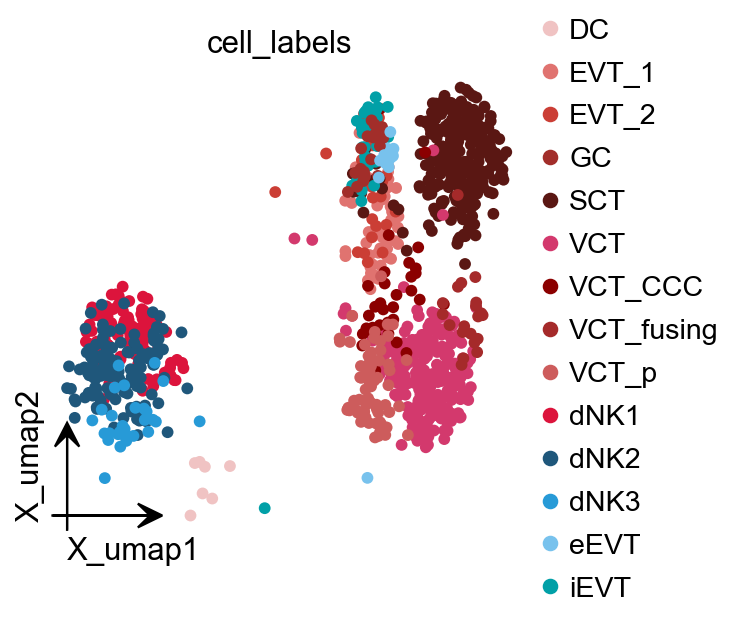

In [4]:
ov.pl.embedding(adata,
               basis='X_umap',
               color='cell_labels',
               frameon='small',
               palette=ov.pl.red_color+ov.pl.blue_color+ov.pl.green_color+ov.pl.orange_color+ov.pl.purple_color)

In [5]:
adata.X.max()

7.124379

We can clearly see that the maximum value of the data is a floating point number less than 10. The fact that the maximum value is not an integer means that it has been normalised, and the fact that it is less than 10 means that it has been logarithmised. Note that our data cannot be `scaled`.

## Cell interaction analysis

Now, we can run `ov.single.run_cellphonedb_v5` to analysis the default the cellphonedb.

In [7]:
cpdb_results, adata_cpdb = ov.single.run_cellphonedb_v5(
    adata,
    cpdb_file_path='./cellphonedb.zip',  # 必需参数
    celltype_key='cell_labels',
    min_cell_fraction=0.005,             # 细胞比例阈值
    min_genes=200,                       # 最小基因数
    min_cells=3,                         # 最小细胞数
    iterations=1000,                     # 置换次数
    threshold=0.1,                       # 表达阈值
    pvalue=0.05,                         # P值阈值
    threads=10,                          # 线程数
    output_dir='./cpdb_results',         # 输出目录
    cleanup_temp=True                    # 清理临时文件
)

🔬 Starting CellPhoneDB analysis...
✅ Valid CellPhoneDB database found: ./cellphonedb.zip (0.1 MB)
   - Original data: 1065 cells, 30800 genes
   - Cell types passing 0.5% threshold: 14
   - Minimum cells required: 5
   - After filtering: 1065 cells, 30800 genes
filtered out 11158 genes that are detected in less than 3 cells
   - After preprocessing: 1065 cells, 19642 genes
   - Temporary directory: /tmp/cpdb_temp_z_7l7c7u
   - Output directory: ./cpdb_results
   - Created temporary input files
   - Running CellPhoneDB statistical analysis...
Reading user files...
The following user files were loaded successfully:
/tmp/cpdb_temp_z_7l7c7u/counts_matrix.h5ad
/tmp/cpdb_temp_z_7l7c7u/metadata.tsv
[ ][CORE][05/08/25-11:32:59][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:10 Precision:3
[ ][CORE][05/08/25-11:32:59][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][05/08/25-11:33:01][INFO] Running Real Analysis
[ ][CORE][05/08/25-11:33:01][INFO]

100%|██████████| 1000/1000 [00:11<00:00, 86.05it/s]


[ ][CORE][05/08/25-11:33:12][INFO] Building Pvalues result
[ ][CORE][05/08/25-11:33:13][INFO] Building results
[ ][CORE][05/08/25-11:33:13][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 14/14 [00:00<00:00, 184.73it/s]

[ ][CORE][05/08/25-11:33:13][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 14/14 [00:00<00:00, 628.97it/s]


[ ][CORE][05/08/25-11:33:14][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 196/196 [00:22<00:00,  8.58it/s]


Saved deconvoluted to ./cpdb_results/statistical_analysis_deconvoluted_08_05_2025_113338.txt
Saved deconvoluted_percents to ./cpdb_results/statistical_analysis_deconvoluted_percents_08_05_2025_113338.txt
Saved means to ./cpdb_results/statistical_analysis_means_08_05_2025_113338.txt
Saved pvalues to ./cpdb_results/statistical_analysis_pvalues_08_05_2025_113338.txt
Saved significant_means to ./cpdb_results/statistical_analysis_significant_means_08_05_2025_113338.txt
Saved interaction_scores to ./cpdb_results/statistical_analysis_interaction_scores_08_05_2025_113338.txt
   - CellPhoneDB analysis completed successfully!
   - Formatting results for visualization...
   - Found 13 info columns and 196 cell type pairs
   - Found 121 pathway classifications
   - Created visualization AnnData: (196, 1441)
   - Cell interactions: 196
   - L-R pairs: 1441
   - Cleaned up temporary directory: /tmp/cpdb_temp_z_7l7c7u
✅ CellPhoneDB analysis pipeline completed!


In [8]:
ov.utils.save(cpdb_results,'data/cpdb/gex_cpdb_test.pkl')
adata_cpdb.write('data/cpdb/gex_cpdb_ad.h5ad')

💾 Save Operation:
   Target path: data/cpdb/gex_cpdb_test.pkl
   Object type: dict
   Using: pickle
   ✅ Successfully saved!
────────────────────────────────────────────────────────────


In [9]:
cpdb_results=ov.utils.load('data/cpdb/gex_cpdb_test.pkl')
adata_cpdb=ov.read('data/cpdb/gex_cpdb_ad.h5ad')

📂 Load Operation:
   Source path: data/cpdb/gex_cpdb_test.pkl
   Using: pickle
   ✅ Successfully loaded!
   Loaded object type: dict
────────────────────────────────────────────────────────────


## Visualize the result of CellPhoneDB look like CellChat

To visualize the cell-cell communication networks similar to CellChat, we first need to initialize the `CellChatViz` class. This visualization framework provides comprehensive tools for analyzing and presenting CellPhoneDB results using modern plotting approaches.

### Initialize CellChatViz Object

The `CellChatViz` class requires the processed CellPhoneDB AnnData object and accepts an optional color palette for consistent cell type coloring across all visualizations.

In [10]:
color_dict=dict(zip(
    adata.obs['cell_labels'].cat.categories,
    adata.uns['cell_labels_colors']
))

In [11]:
viz = ov.pl.CellChatViz(adata_cpdb,palette=color_dict)
adata_cpdb

AnnData object with n_obs × n_vars = 196 × 1441
    obs: 'sender', 'receiver'
    var: 'id_cp_interaction', 'interacting_pair', 'partner_a', 'partner_b', 'gene_a', 'gene_b', 'secreted', 'receptor_a', 'receptor_b', 'annotation_strategy', 'is_integrin', 'directionality', 'classification', 'interaction_name'
    layers: 'means', 'pvalues'

## Calculate the aggregated cell-cell communication network

The aggregated cell-cell communication network provides a high-level overview of communication patterns between different cell types. We can visualize either the **number of interactions** (count) or the **total interaction strength** (weights) between any two cell groups using circle plots.

### Understanding Aggregated Networks

- **Count Matrix**: Shows the number of significant ligand-receptor pairs between cell types
- **Weight Matrix**: Represents the cumulative interaction strength based on mean expression levels

These networks help identify the most communicatively active cell types and reveal dominant communication axes in your tissue or experimental system.

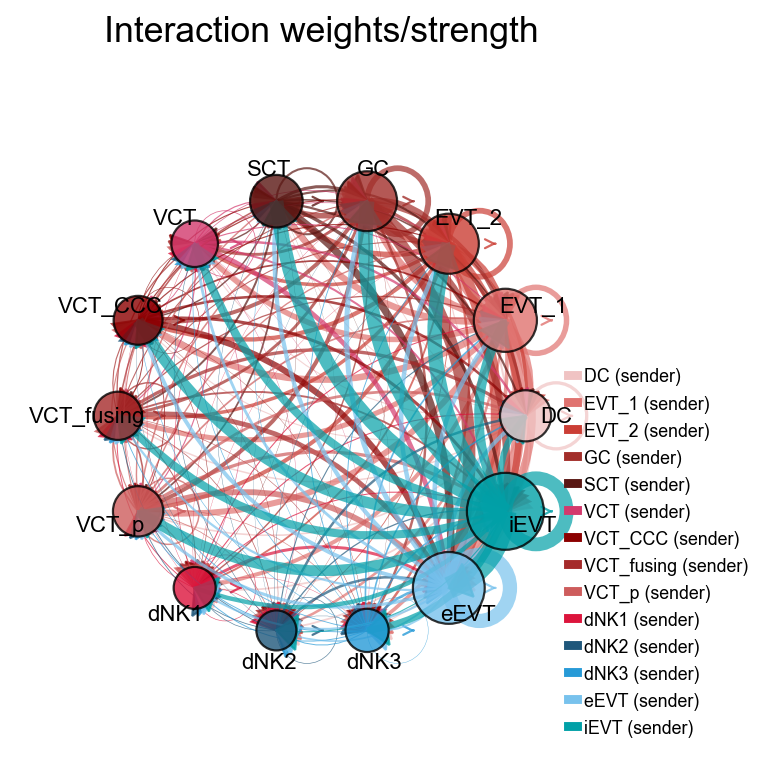

In [12]:
count_matrix, weight_matrix=viz.compute_aggregated_network(pvalue_threshold=0.05, use_means=True)
fig2, ax2 = viz.netVisual_circle(
    weight_matrix,
    title="Interaction weights/strength",
    cmap='Reds',
    vertex_size_max=10,
    figsize=(5, 5),
)

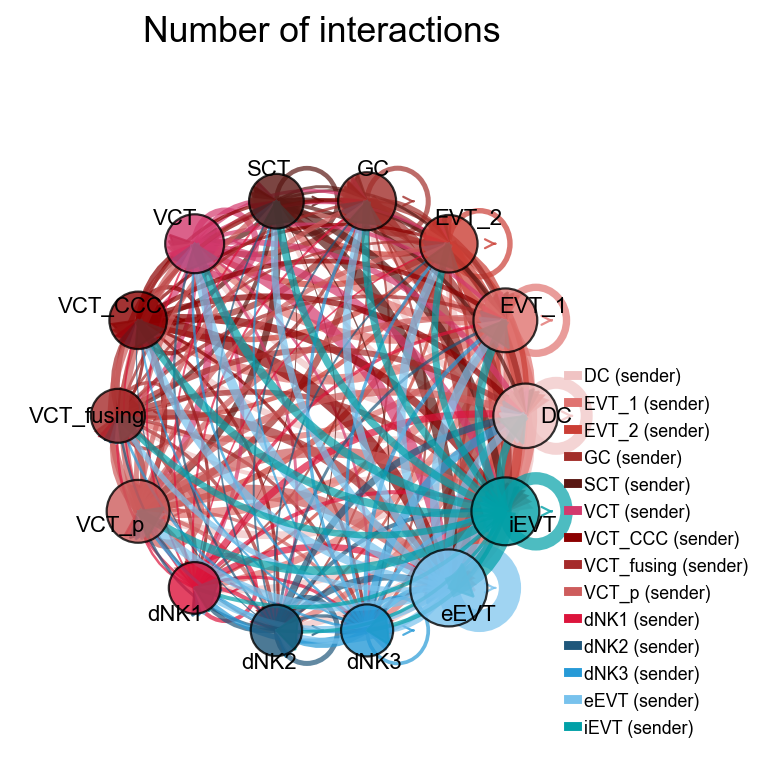

In [13]:
fig2, ax2 = viz.netVisual_circle(
    count_matrix,
    title="Number of interactions",
    cmap='Reds',
    vertex_size_max=10,
    figsize=(5, 5),
)

### Individual Circle Plots for Outgoing and Incoming Signals

Due to the complexity of cell-cell communication networks, we can examine signaling patterns from different perspectives:

- **Outgoing signals**: Shows which cell types are the most active **senders** of communication signals
- **Incoming signals**: Reveals which cell types are the most active **receivers** of communication signals

By using `netVisual_individual_circle`, we can compare edge weights between different networks while maintaining consistent scaling parameters. This approach is particularly useful for identifying cell types that serve as communication hubs in your system.

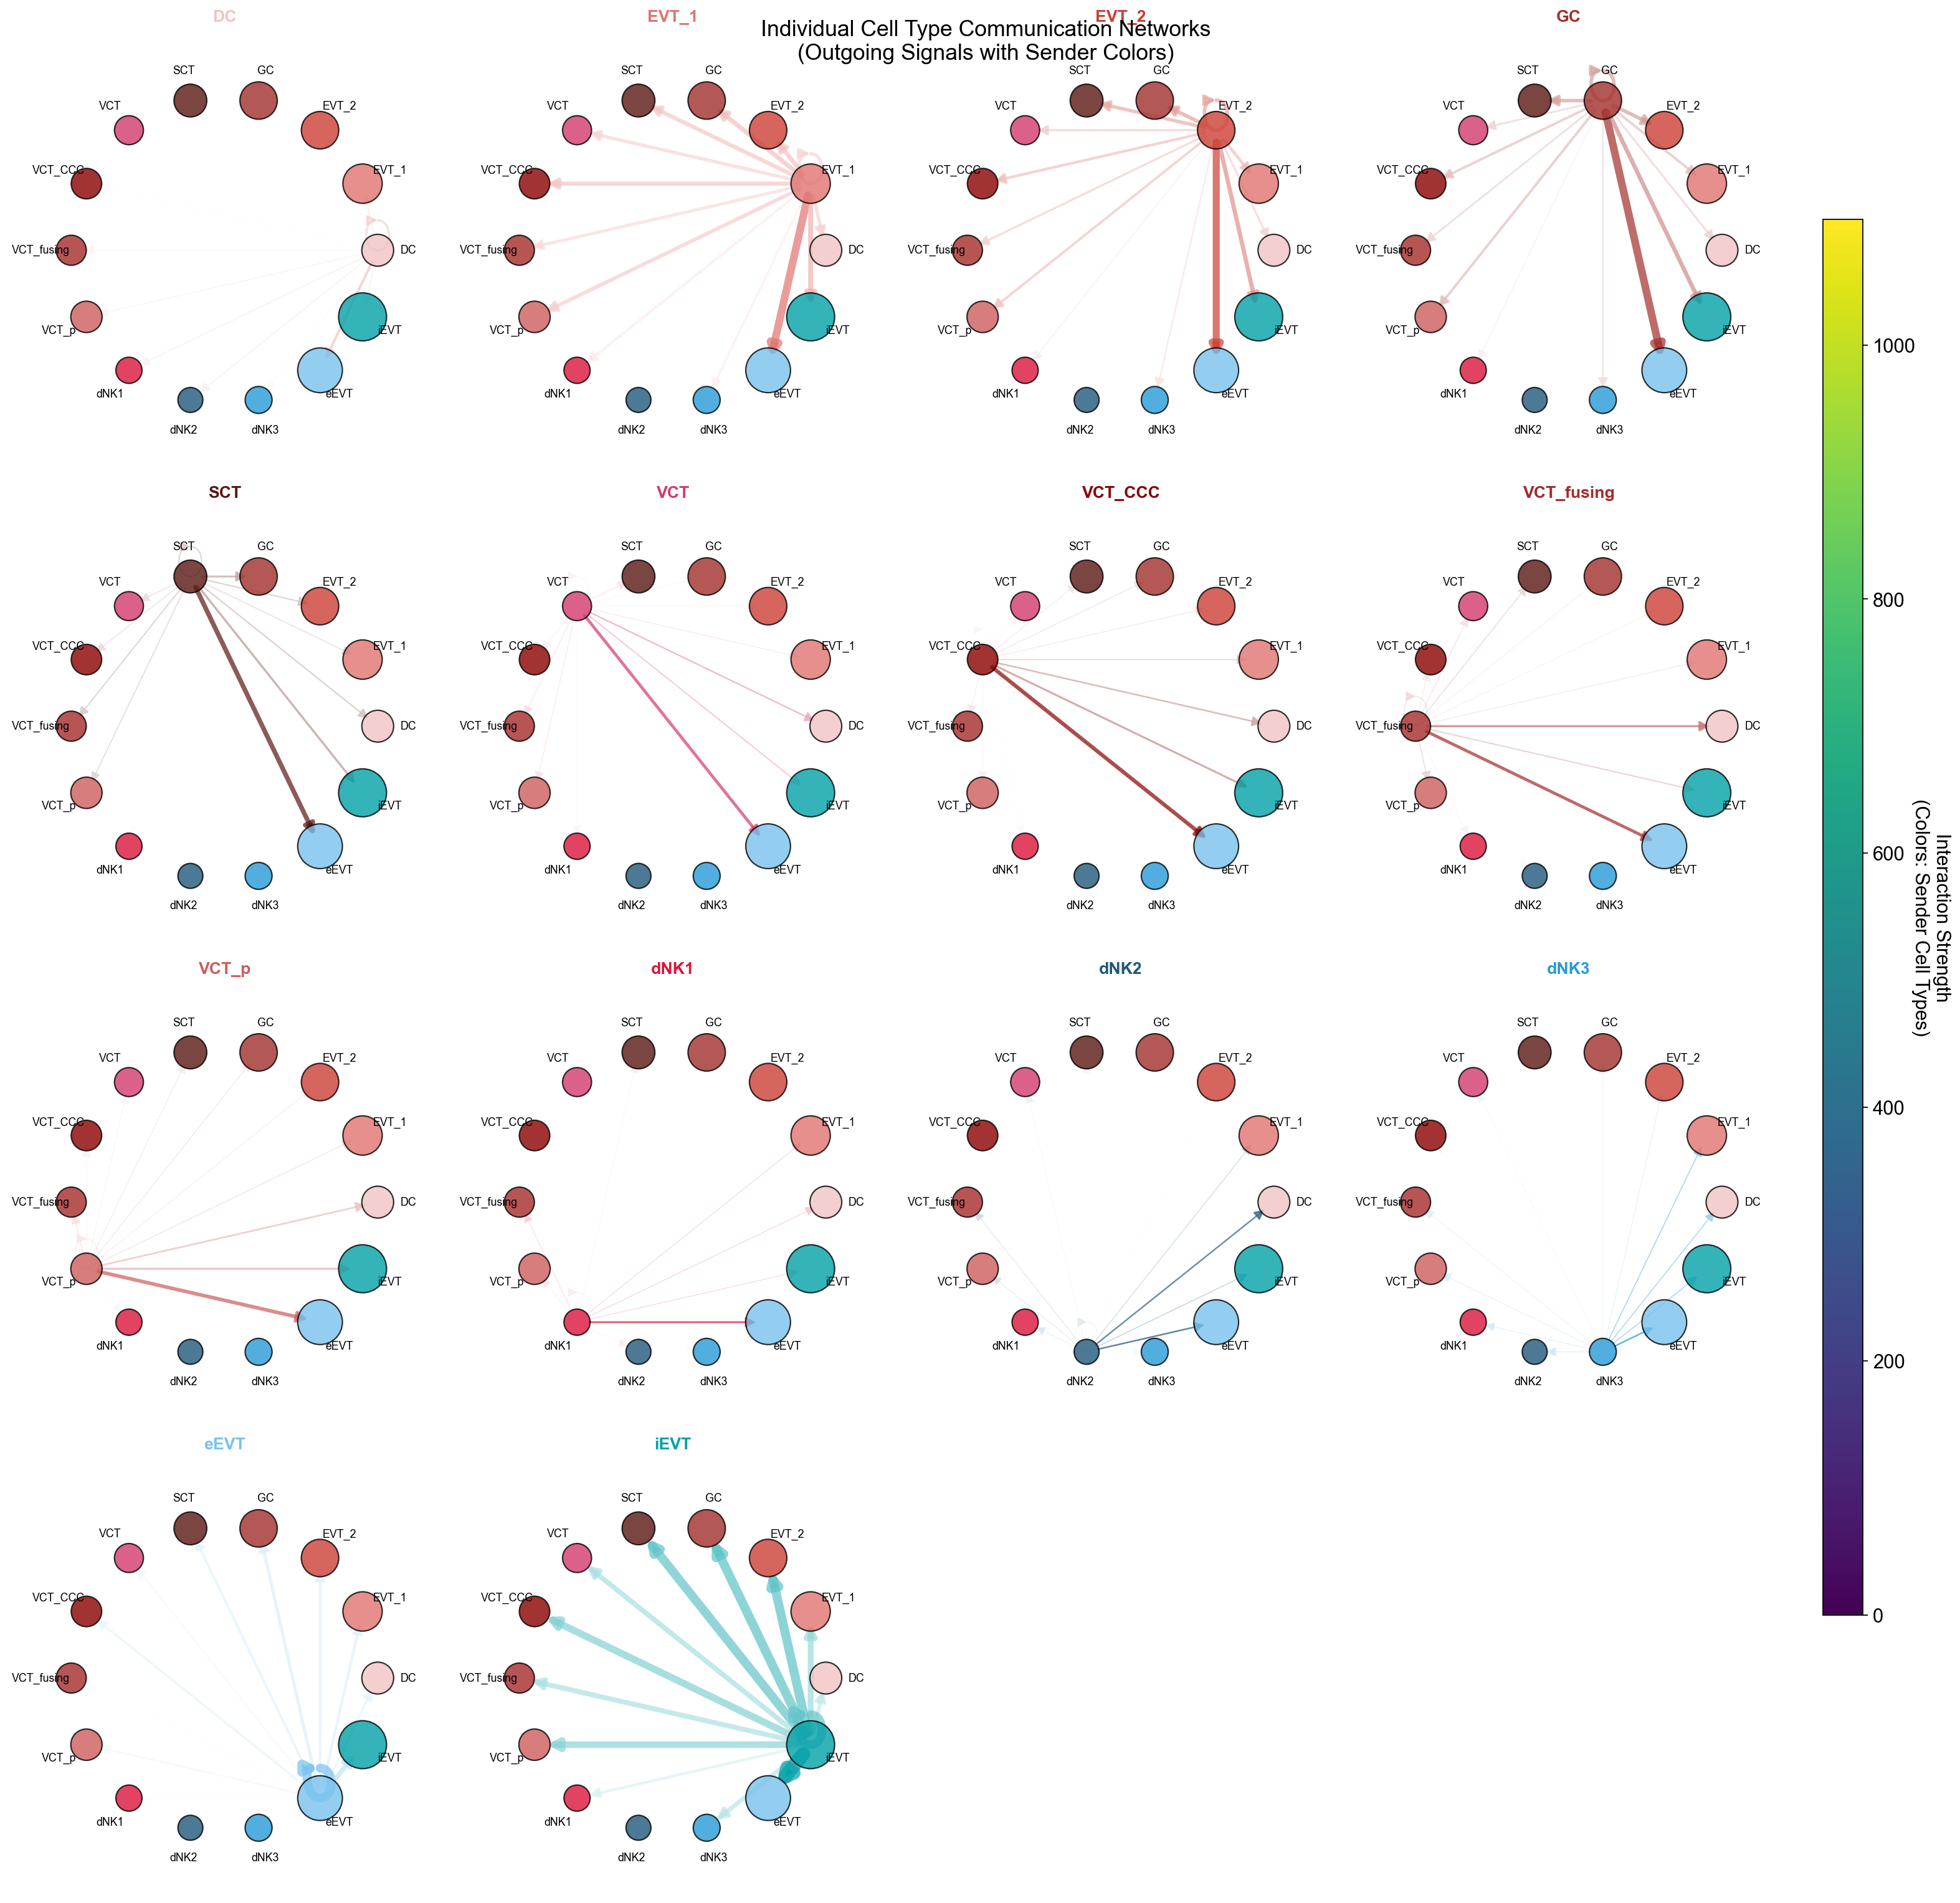

In [14]:
# 绘制所有细胞类型的向外信号（类似CellChat功能）
fig = viz.netVisual_individual_circle(
    pvalue_threshold=0.05,
    vertex_size_max=10,
    edge_width_max=10,  # 保持一致以便比较
    show_labels=True,
    cmap='Blues',
    figsize=(20, 20),
    ncols=4,
    #vertex_size_max=10,
)

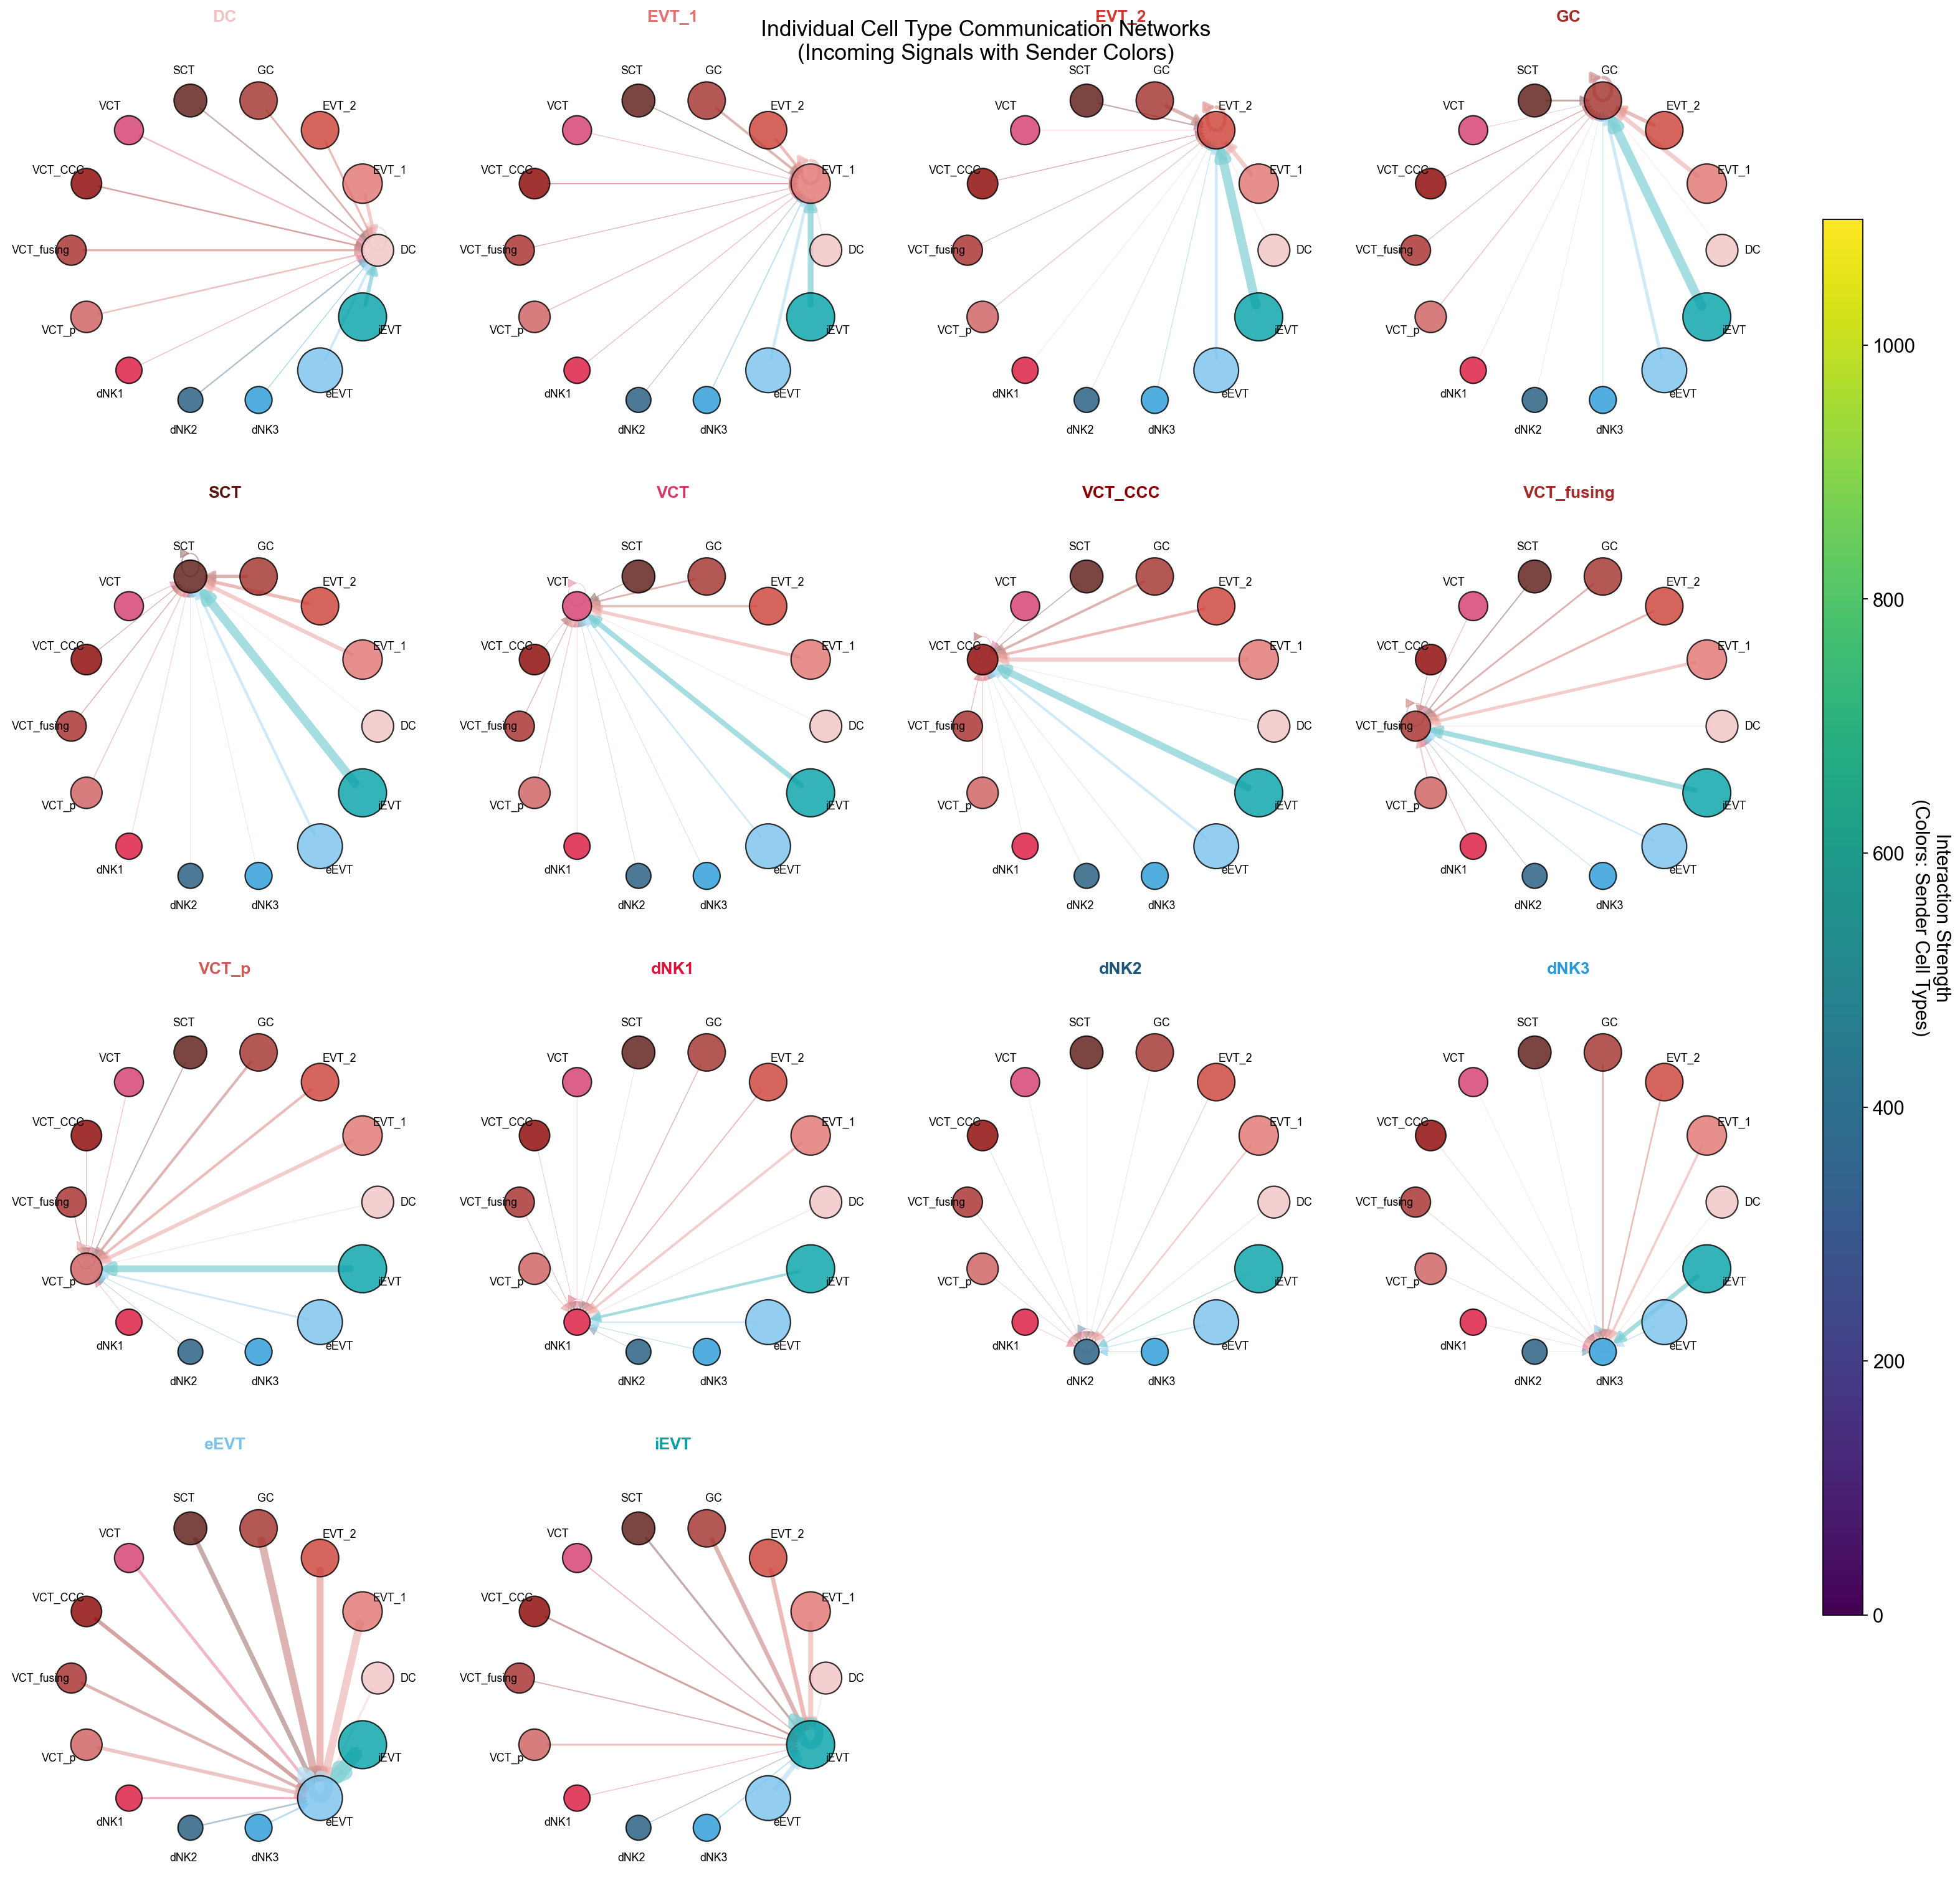

In [15]:
# 绘制接收信号
fig = viz.netVisual_individual_circle_incoming(
    pvalue_threshold=0.05,
    cmap='Reds',
    figsize=(20, 20),
    ncols=4,
    vertex_size_max=10,
)

## Visualize each signaling pathway using Hierarchy plot, Circle plot or Chord diagram

### Part I: Identify signaling pathways showing significant communications

Now we turn to pathway-level analysis. CellPhoneDB organizes ligand-receptor pairs into functional pathways based on their biological roles. We can identify the most significant signaling pathways by computing pathway-level communication strength.

#### Pathway Significance Analysis

The analysis involves:
1. **Pathway aggregation**: Group L-R pairs by functional classification
2. **Strength calculation**: Compute total communication strength per pathway
3. **Significance assessment**: Identify pathways with strong and statistically significant communications

This approach helps focus downstream analysis on the most biologically relevant signaling systems.

In [16]:
pathway_comm = viz.compute_pathway_communication(
  method='mean',           # 对通路内L-R对取平均
  min_lr_pairs=2,         # 通路至少包含2个L-R对
  min_expression=0.1      # 过滤低表达交互
)
# 方法2：基于通路强度判断显著通路
sig_pathways, summary = viz.get_significant_pathways_v2(
  pathway_comm,
  strength_threshold=0.5,    # 通路平均强度阈值
  pvalue_threshold=0.05,     # 个别L-R对的p-value阈值
  min_significant_pairs=1    # 至少1对细胞显著
)

🔬 Calculating cell communication strength for 121 pathways...
   - Aggregation method: mean
   - Minimum expression threshold: 0.1


✅ Completed pathway communication strength calculation for 107 pathways
📊 Pathway significance analysis results:
   - Total pathways: 107
   - Significant pathways: 69
   - Strength threshold: 0.5
   - p-value threshold: 0.05

🏆 Top 10 pathways by total strength:
----------------------------------------------------------------------------------------------------
Pathway                        Total    Max     Mean    L-R  Active Sig  Rate   Status
----------------------------------------------------------------------------------------------------
Adhesion by Fibronectin        4488.87  145.91  22.90   12   196    52   0.27   ***
Signaling by Annexin           885.09   26.18   6.32    2    140    7    0.05   ***
Signaling by Placenta growth   829.15   21.65   5.06    4    164    59   0.36   ***
Signaling by Teneurin          734.99   10.64   4.15    12   177    43   0.24   ***
Signaling by Amyloid-beta pr   613.11   26.05   3.18    5    193    63   0.33   ***
Signaling by Steroids      

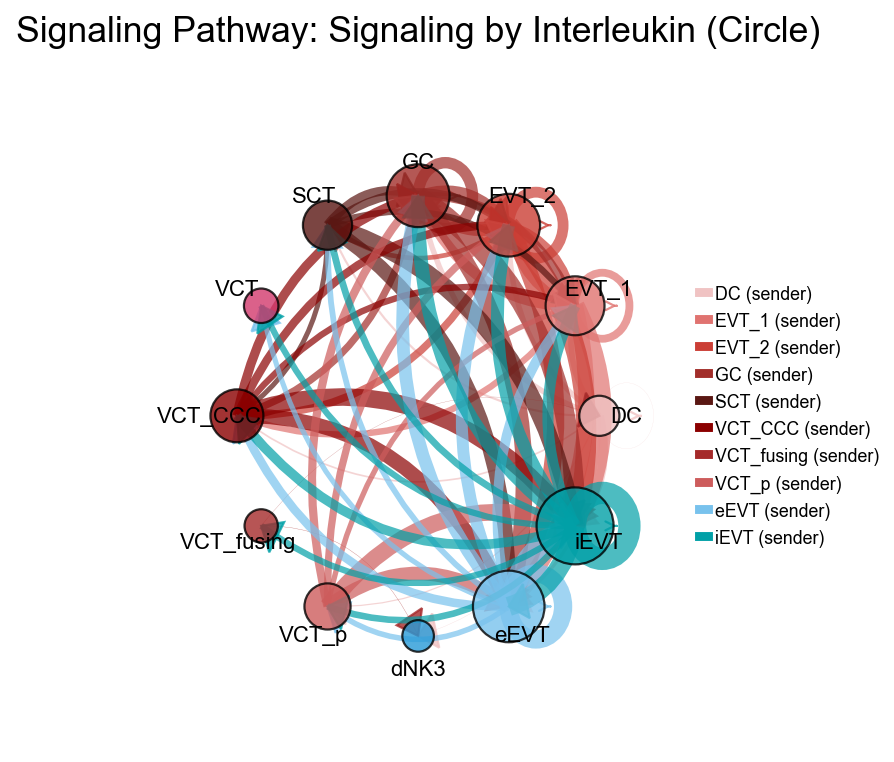

In [17]:
# 2. 绘制特定通路的圆形图
pathways_show = ["Signaling by Interleukin"]  # 或者从上面获取的列表中选择
fig, ax = viz.netVisual_aggregate(
    signaling=pathways_show, 
    layout="circle",
    figsize=(5, 5),
    vertex_size_max=10,
)


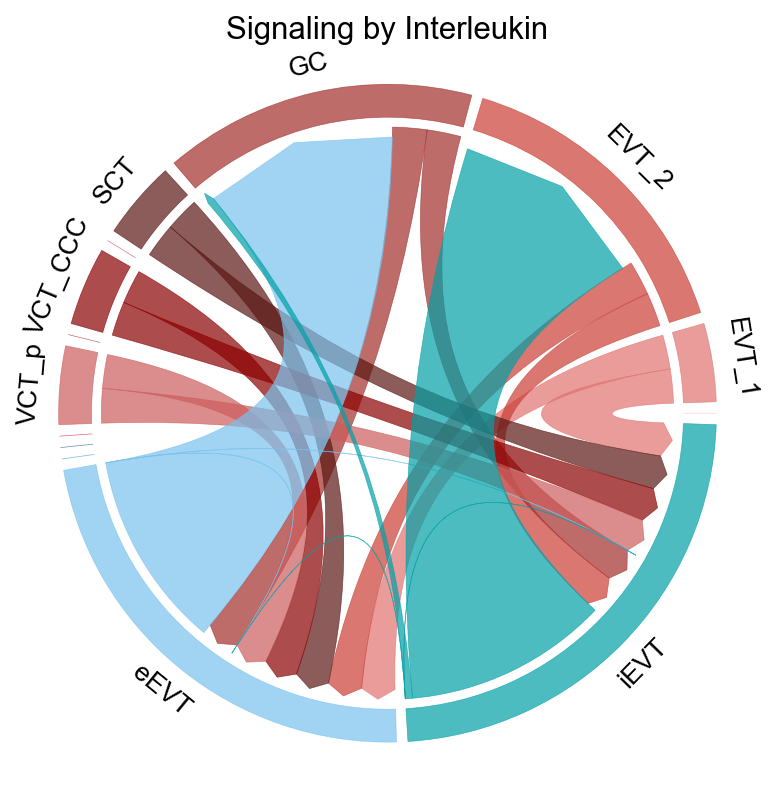

In [18]:
fig, ax = viz.netVisual_chord_cell(
    signaling=pathways_show[0],
    group_celltype=None,
    count_min=10,
    figsize=(5,5),
    normalize_to_sender=True
)
ax.set_title(pathways_show[0])
fig.show()

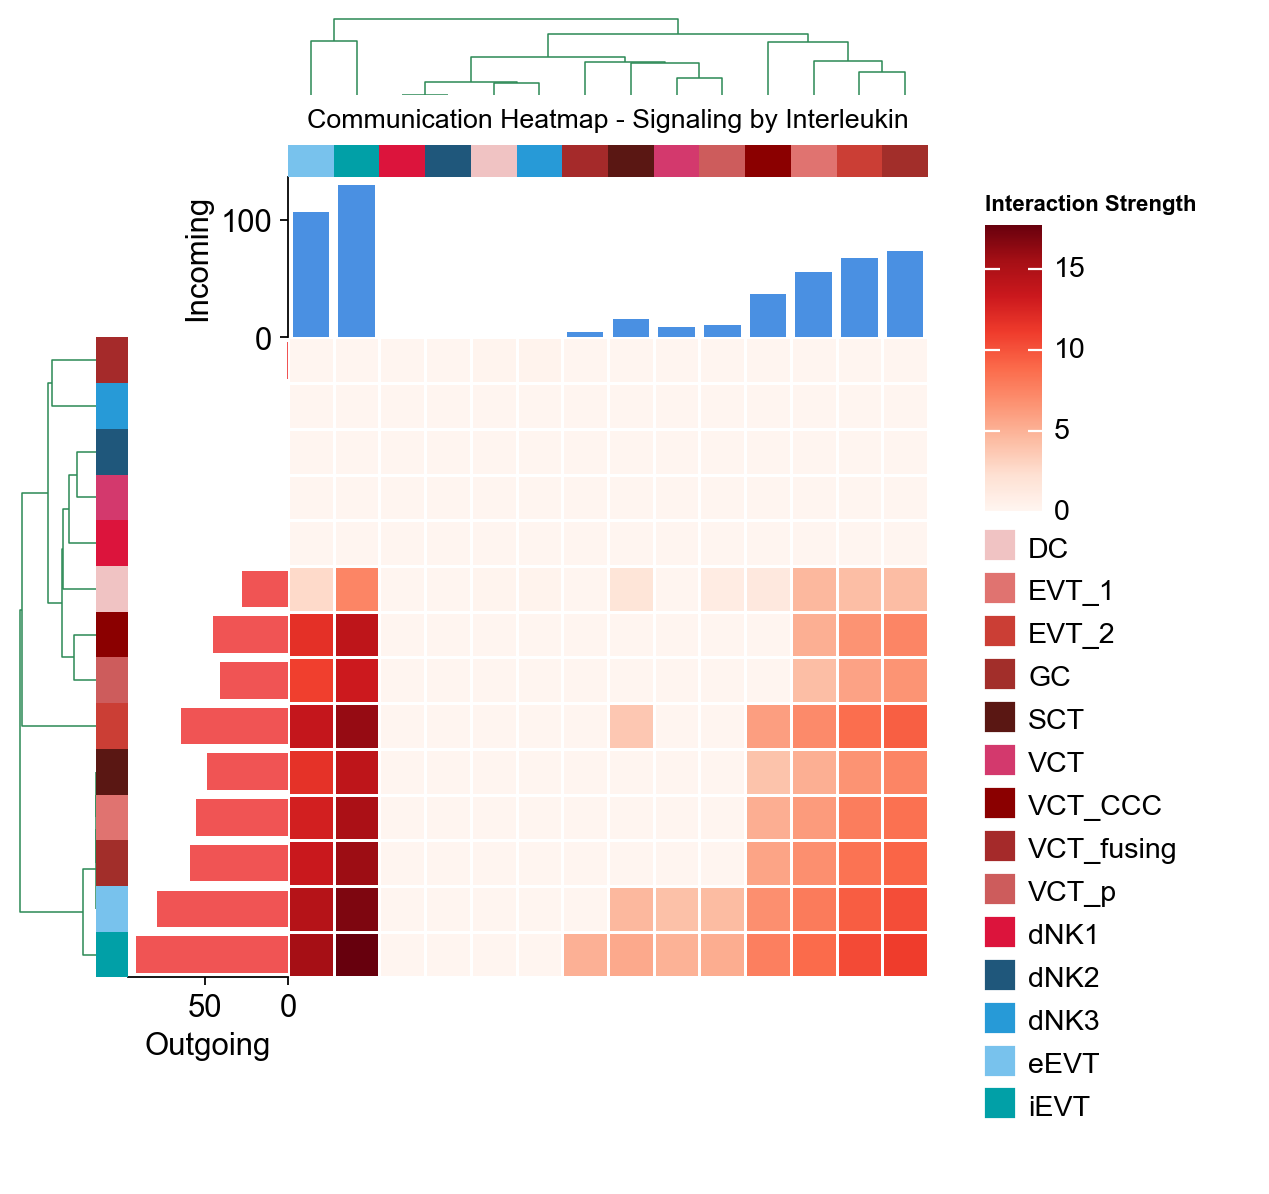

In [19]:
h = viz.netVisual_heatmap_marsilea(
    signaling=pathways_show,      # 指定信号通路
    color_heatmap="Reds",        # CellChat的color.heatmap参数
    add_dendrogram=True,
    #title="CXCL Signaling Heatmap"
)
h.render()

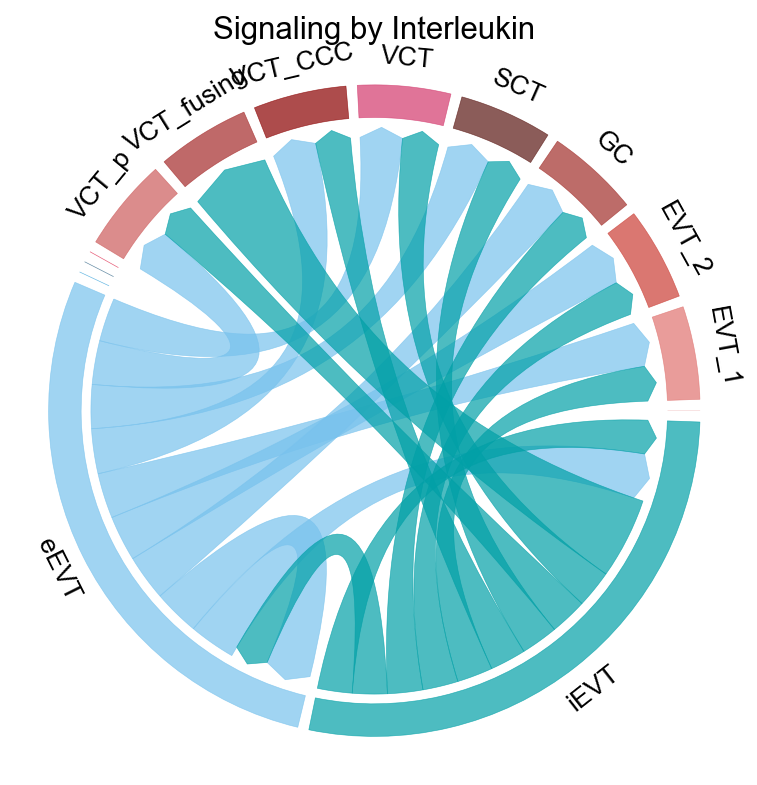

In [20]:
fig, ax = viz.netVisual_chord_cell(
    signaling=pathways_show[0],
    group_celltype=None,
    count_min=0,
    figsize=(5,5),
    sources=['eEVT','iEVT',],
    normalize_to_sender=True
)
ax.set_title(pathways_show[0])
fig.show()

### Part II: Identify ligand-receptor pairs contributing to signaling pathways

Once we've identified significant pathways, we need to understand which specific ligand-receptor pairs drive the communication within each pathway. This analysis helps:

1. **Identify key L-R pairs**: Find the most contributory interactions within pathways
2. **Prioritize targets**: Focus on the most important molecular mechanisms
3. **Understand specificity**: See which cell type pairs use specific L-R interactions

### Contribution Analysis and Bubble Plots

We can visualize pathway-specific communications using:
- **Contribution analysis**: Quantify how much each L-R pair contributes to pathway strength
- **Bubble plots**: Show interaction patterns across cell types with statistical significance
- **Chord diagrams**: Display specific L-R pair communications between cell types

✅ Found 5 enriched L-R pairs in pathway(s): Signaling by Fibroblast growth factor
Find 5 sig L-R
Signaling by Fibroblast growth factor most important L-R pair: NCAM1_FGFR1
📊 Visualization statistics:
   - Number of significant interactions: 20
   - Number of cell type pairs: 19
   - Signaling pathways: 1
   - Data scaling: None (raw expression values)
   - Color bars: sender


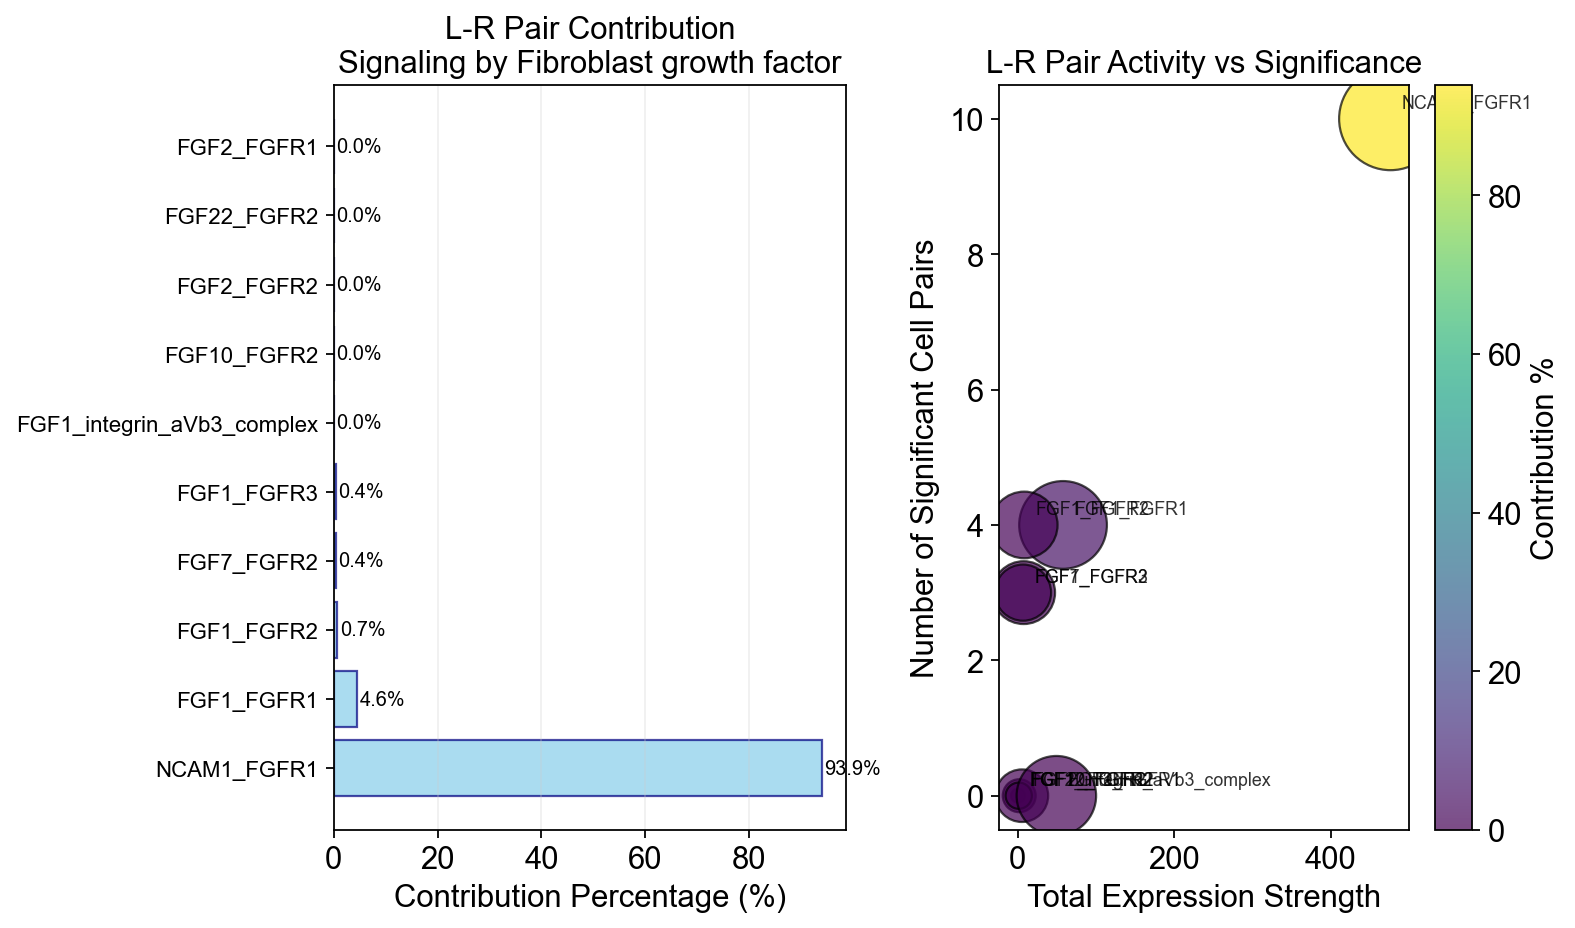

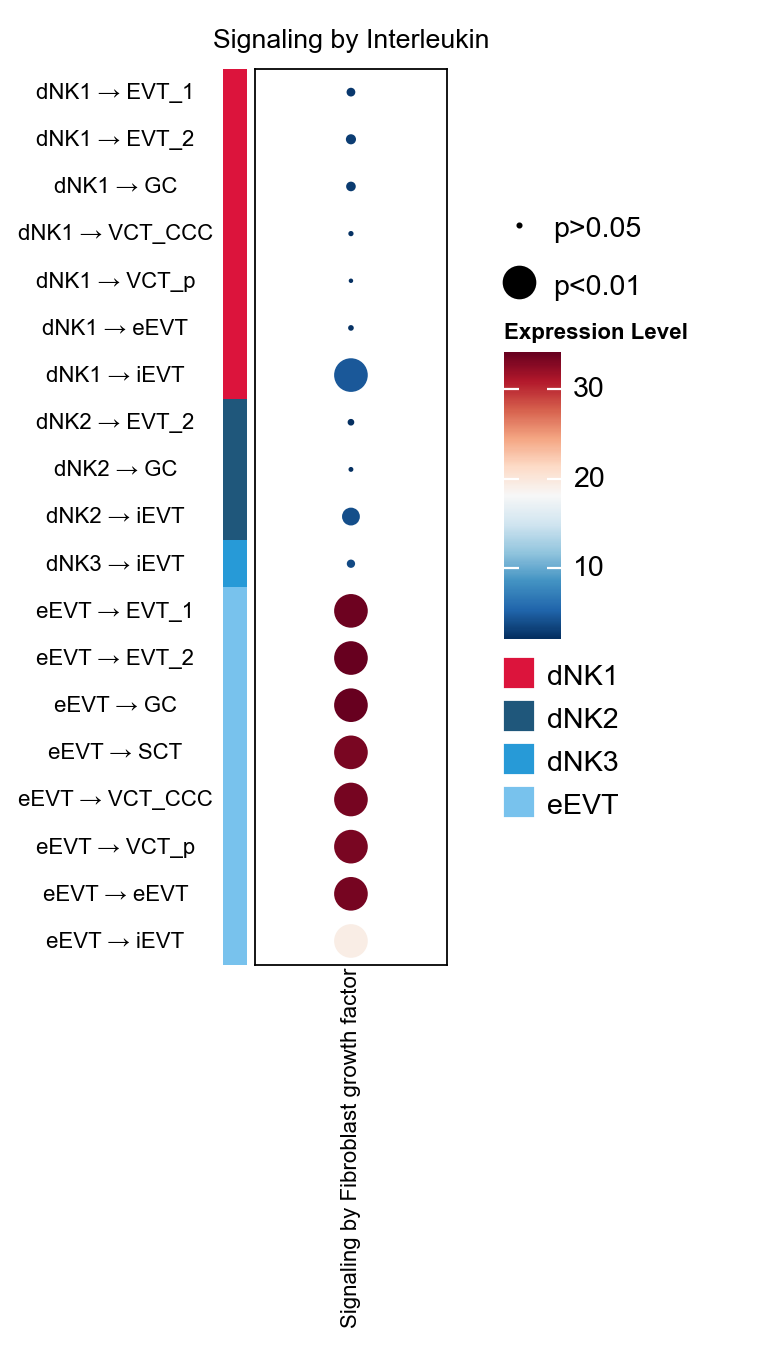

In [21]:
pathways = ['Signaling by Fibroblast growth factor']

enriched_lr = viz.extractEnrichedLR(pathways)
print(f"Find {len(enriched_lr)} sig L-R")

for pathway in pathways:
  contribution_df, fig, axes = viz.netAnalysis_contribution(pathway)
  print(f"{pathway} most important L-R pair: {contribution_df.iloc[0]['ligand_receptor']}")

viz.netVisual_bubble_marsilea(sources_use=None, targets_use=None, 
                                 signaling=pathways, pvalue_threshold=1, 
                                 mean_threshold=0.1, top_interactions=20,
                                 show_pvalue=False, show_mean=False, show_count=True,
                                 add_violin=True, add_dendrogram=True,
                                 group_pathways=True, figsize=(2, 8),
                              font_size=10,
                                 title=pathways_show[0], 
                                 remove_isolate=False)

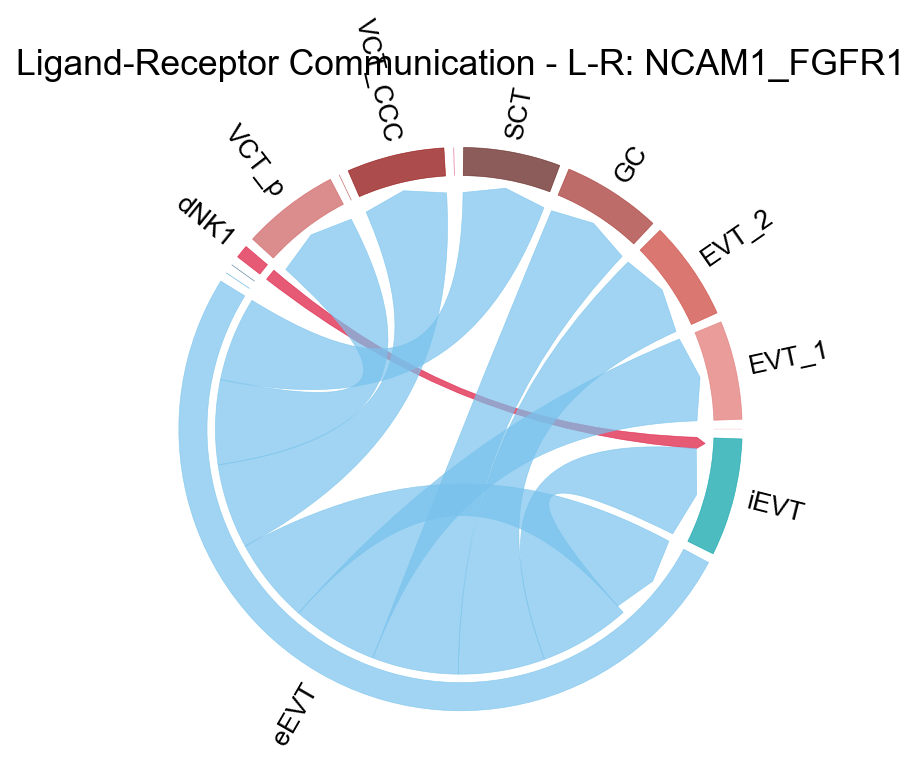

In [22]:
fig, ax = viz.netVisual_chord_LR(
    ligand_receptor_pairs='NCAM1_FGFR1',
    #group_celltype=None,
    count_min=1,
    figsize=(5,5),
    sources=['eEVT','dNK1',],
    rotate_names=True
    
    #normalize_to_sender=True
)
fig.show()

## Visualize cell-cell communication mediated by multiple ligand-receptors or signaling pathways

### Part III: Systems-level visualization of multiple pathways and L-R pairs

For comprehensive analysis, we often need to visualize communications across multiple pathways or compare different biological contexts. This systems-level view helps:

1. **Cross-pathway analysis**: Compare communication patterns between different signaling systems
2. **Cell type-specific analysis**: Focus on communications from specific sender cell types
3. **Pathway integration**: Understand how multiple pathways work together in cell communication

### Advanced Visualization Approaches

- **Multi-pathway bubble plots**: Compare multiple pathways side-by-side
- **Source-specific analysis**: Focus on signals from particular cell types
- **Chord diagrams with gene information**: Show detailed molecular interactions

📊 Visualization statistics:
   - Number of significant interactions: 21
   - Number of cell type pairs: 5
   - Ligand-receptor pairs: 11
   - Data scaling: None (raw expression values)
   - Color bars: sender


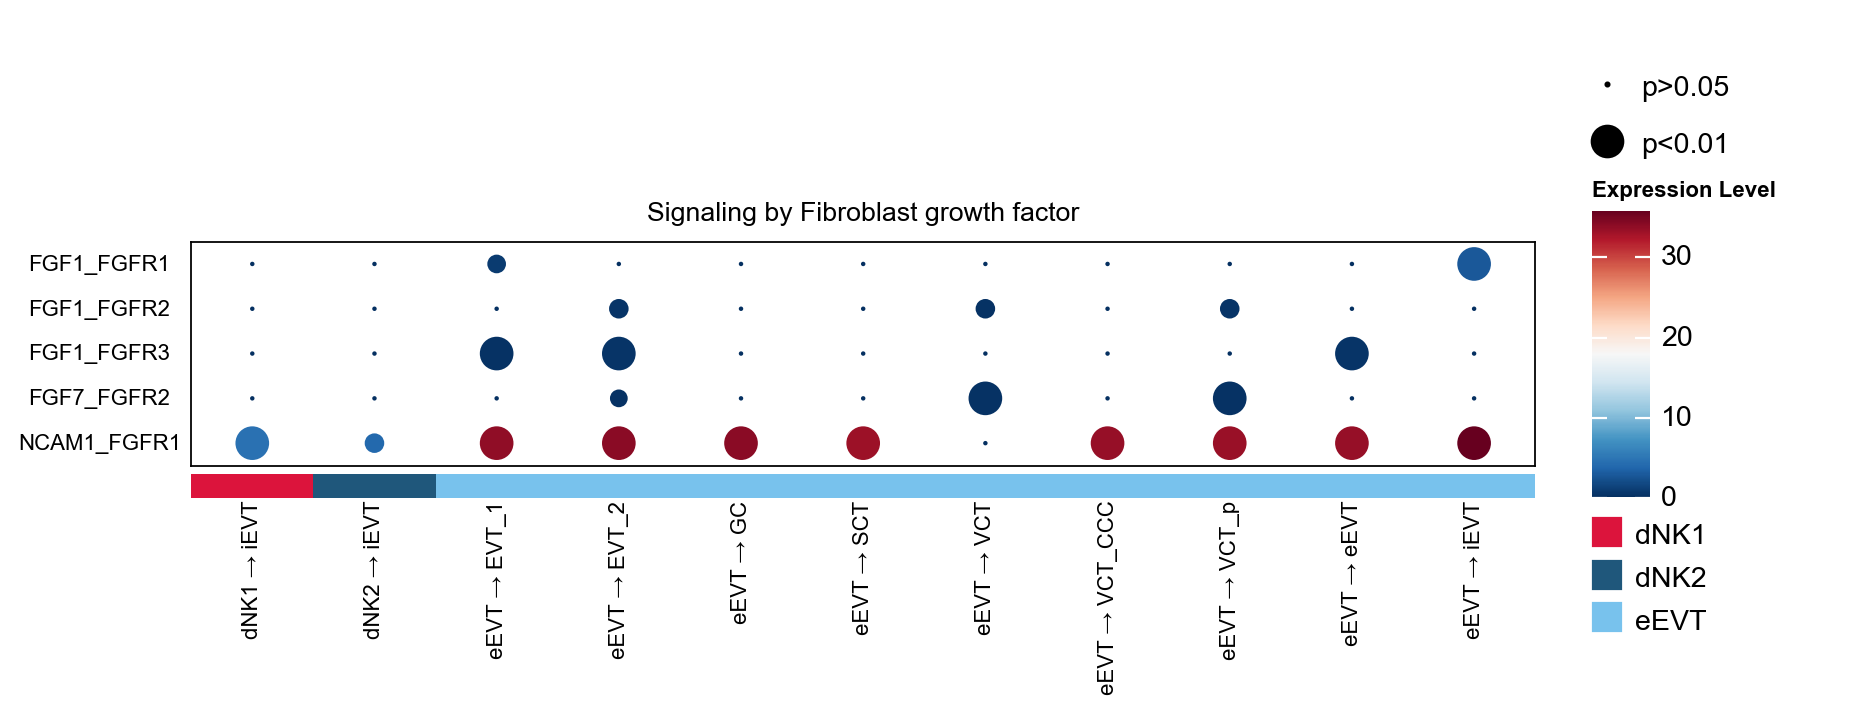

In [23]:
viz.netVisual_bubble_marsilea(sources_use=None,
                                 signaling=['Signaling by Fibroblast growth factor'], pvalue_threshold=0.01, 
                              #show_mean=False,
                                 mean_threshold=0.1, top_interactions=200,cmap='RdBu_r',
                                 show_pvalue=False, show_mean=False, show_count=True,
                                 #add_violin=True, 
                                 add_dendrogram=False,font_size=10,
                                 group_pathways=False, figsize=(14, 2),transpose=True,
                                 title="Signaling by Fibroblast growth factor", 
                                 remove_isolate=False)

⚠️  Warning: All p-values are identical. Adding slight jitter for better visualization.
⚠️  Warning: All p-values are identical after jittering. Using medium size.
📊 Visualization statistics:
   - Number of significant interactions: 1
   - Number of cell type pairs: 1
   - Ligand-receptor pairs: 1
   - Data scaling: None (raw expression values)
   - Color bars: sender


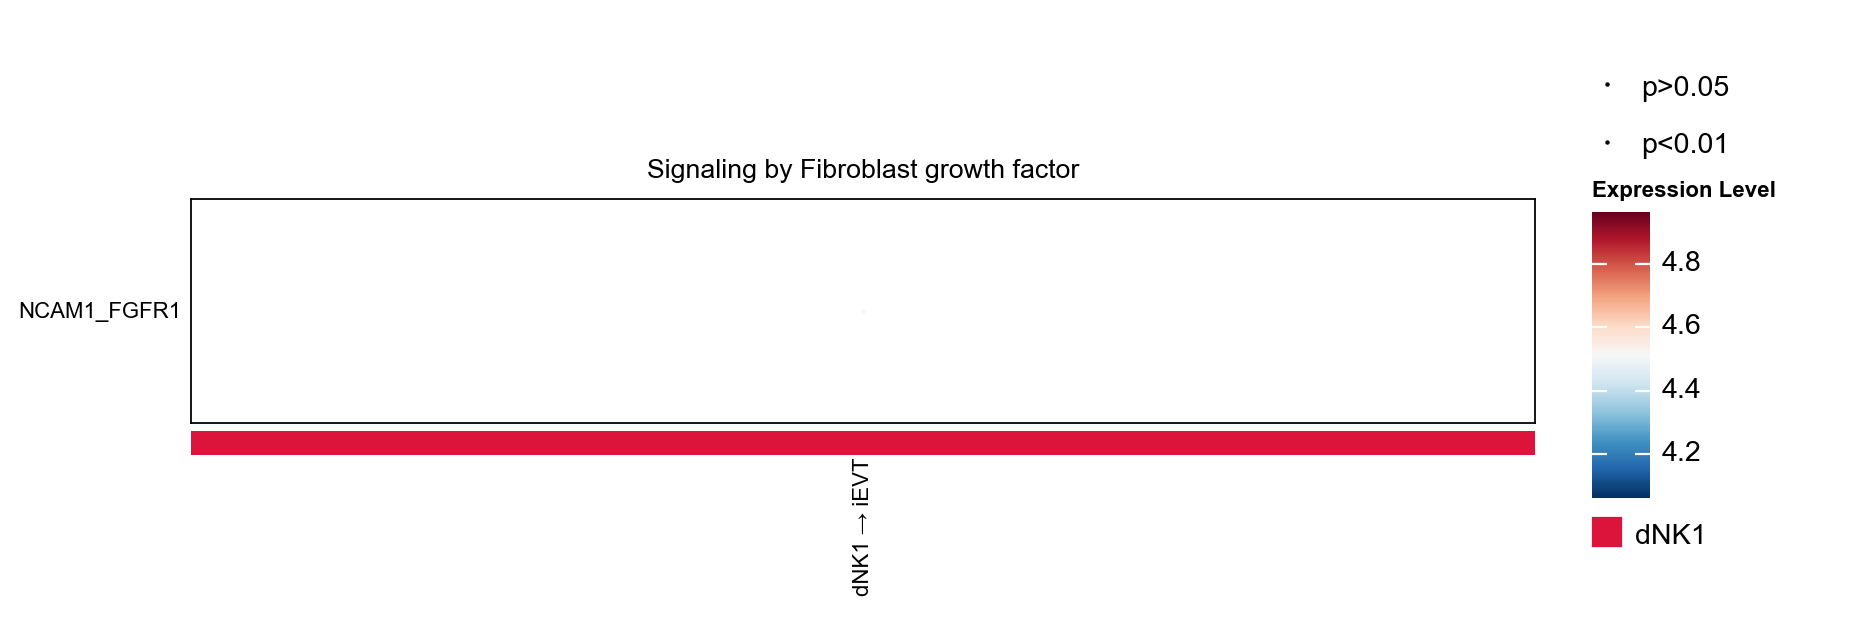

In [24]:
viz.netVisual_bubble_marsilea(sources_use=['dNK1'],
                                 signaling=['Signaling by Fibroblast growth factor'], pvalue_threshold=0.01, 
                              #show_mean=False,
                                 mean_threshold=0.1, top_interactions=200,cmap='RdBu_r',
                                 show_pvalue=False, show_mean=False, show_count=True,
                                 #add_violin=True, 
                                 add_dendrogram=False,font_size=10,
                                 group_pathways=False, figsize=(14, 2),transpose=True,
                                 title="Signaling by Fibroblast growth factor", 
                                 remove_isolate=False)

📊 Visualization statistics:
   - Number of significant interactions: 27
   - Number of cell type pairs: 2
   - Signaling pathways: 16
   - Data scaling: None (raw expression values)
   - Color bars: sender


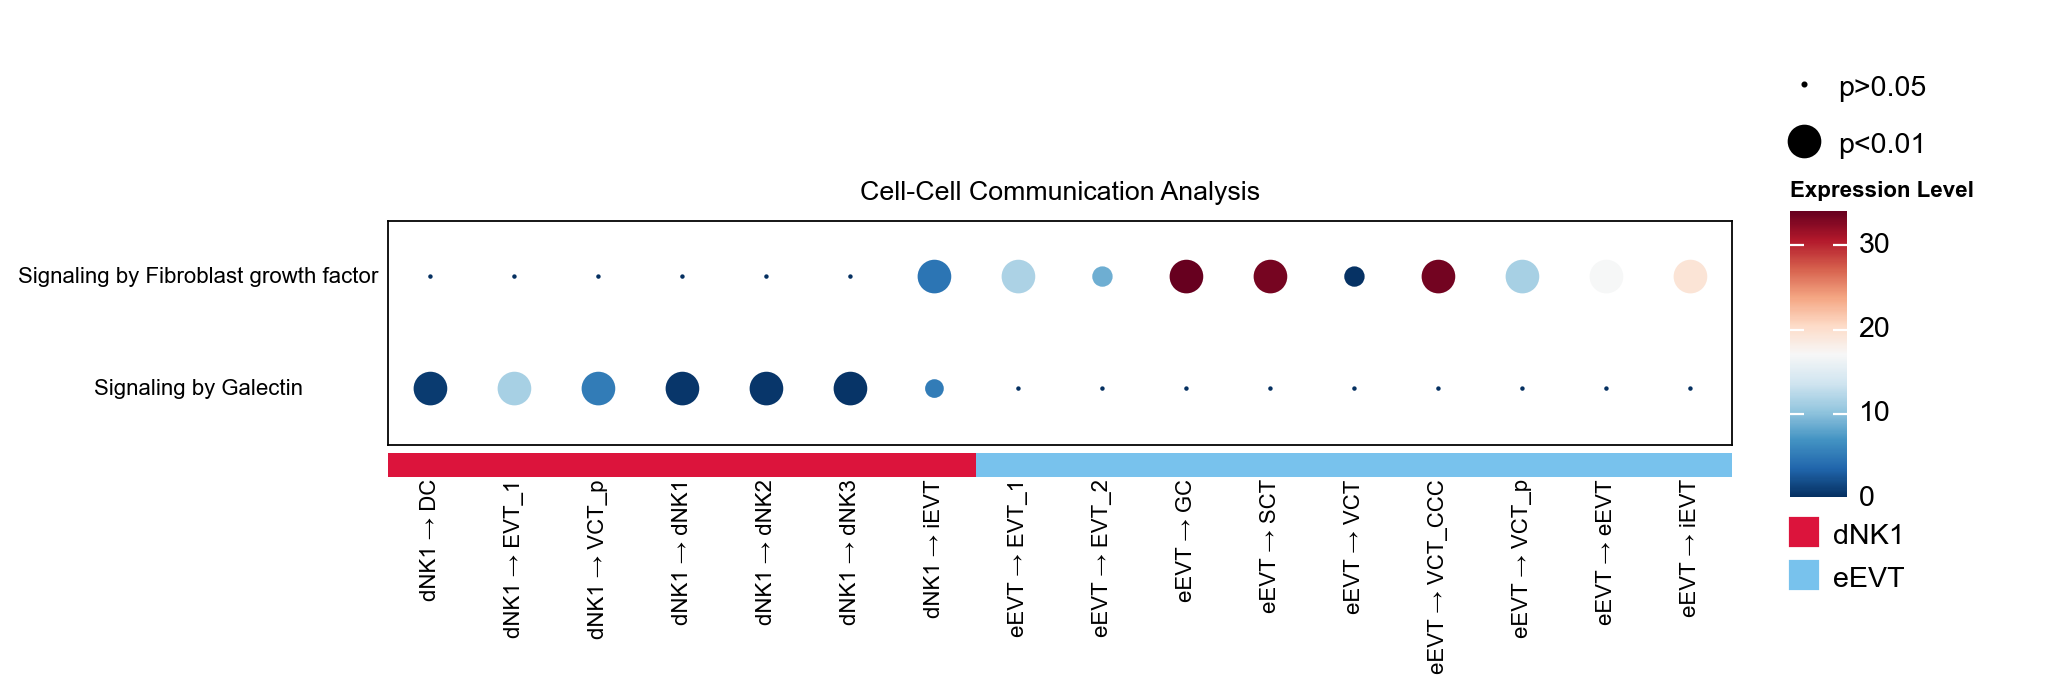

In [25]:
viz.netVisual_bubble_marsilea(sources_use=['eEVT','dNK1'], 
                                 signaling=['Signaling by Fibroblast growth factor',
                                           'Signaling by Galectin'], pvalue_threshold=0.01, 
                              #show_mean=False,
                                 mean_threshold=0.1, top_interactions=200,cmap='RdBu_r',
                                 show_pvalue=False, show_mean=False, show_count=True,
                                 #add_violin=True, 
                                 add_dendrogram=False,font_size=10,
                                 group_pathways=True, figsize=(14, 2),transpose=True,
                                 title="Cell-Cell Communication Analysis", 
                                 remove_isolate=False)

(<Figure size 320x320 with 1 Axes>,
 <Axes: title={'center': 'Ligand-Receptor Interactions\nFrom: eEVT, dNK1 → To: 14 cell types\nSignaling: Signaling by Fibroblast growth factor'}>)

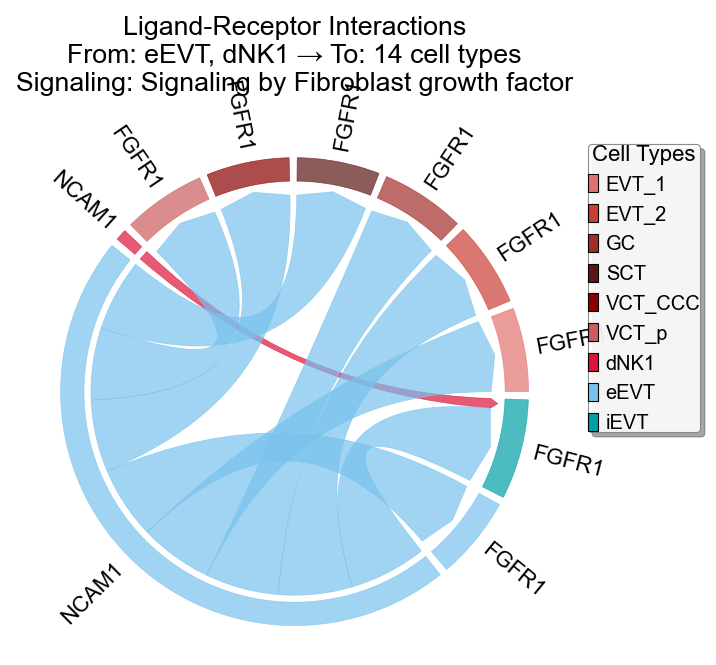

In [26]:
viz.netVisual_chord_gene(sources_use=['eEVT','dNK1'], targets_use=None, 
                     signaling=['Signaling by Fibroblast growth factor'],
                            pvalue_threshold=0.001, mean_threshold=4,
                            gap=0.03, use_gradient=True, sort="size", 
                            directed=True, chord_colors=None,
                            rotate_names=True, fontcolor="black", fontsize=10,
                            start_at=0, extent=360, min_chord_width=0,
                            ax=None, figsize=(4, 4), show_celltype_in_name=False,
                            title_name=None, save=None)

✅ Network centrality calculation completed (CellChat-style Importance values)
   - Signaling pathways used: All pathways
   - Weight mode: Weighted
   - Calculated metrics: outdegree, indegree, flow_betweenness, information, overall
   - All centrality scores normalized to 0-1 range (Importance values)
📊 信号角色分析结果（Marsilea可视化，Importance值 0-1）:
   - Dominant Sender: iEVT (Importance: 1.000)
   - Dominant Receiver: eEVT (Importance: 1.000)
   - Mediator: dNK2 (Importance: 1.000)
   - Influencer: iEVT (Importance: 1.000)


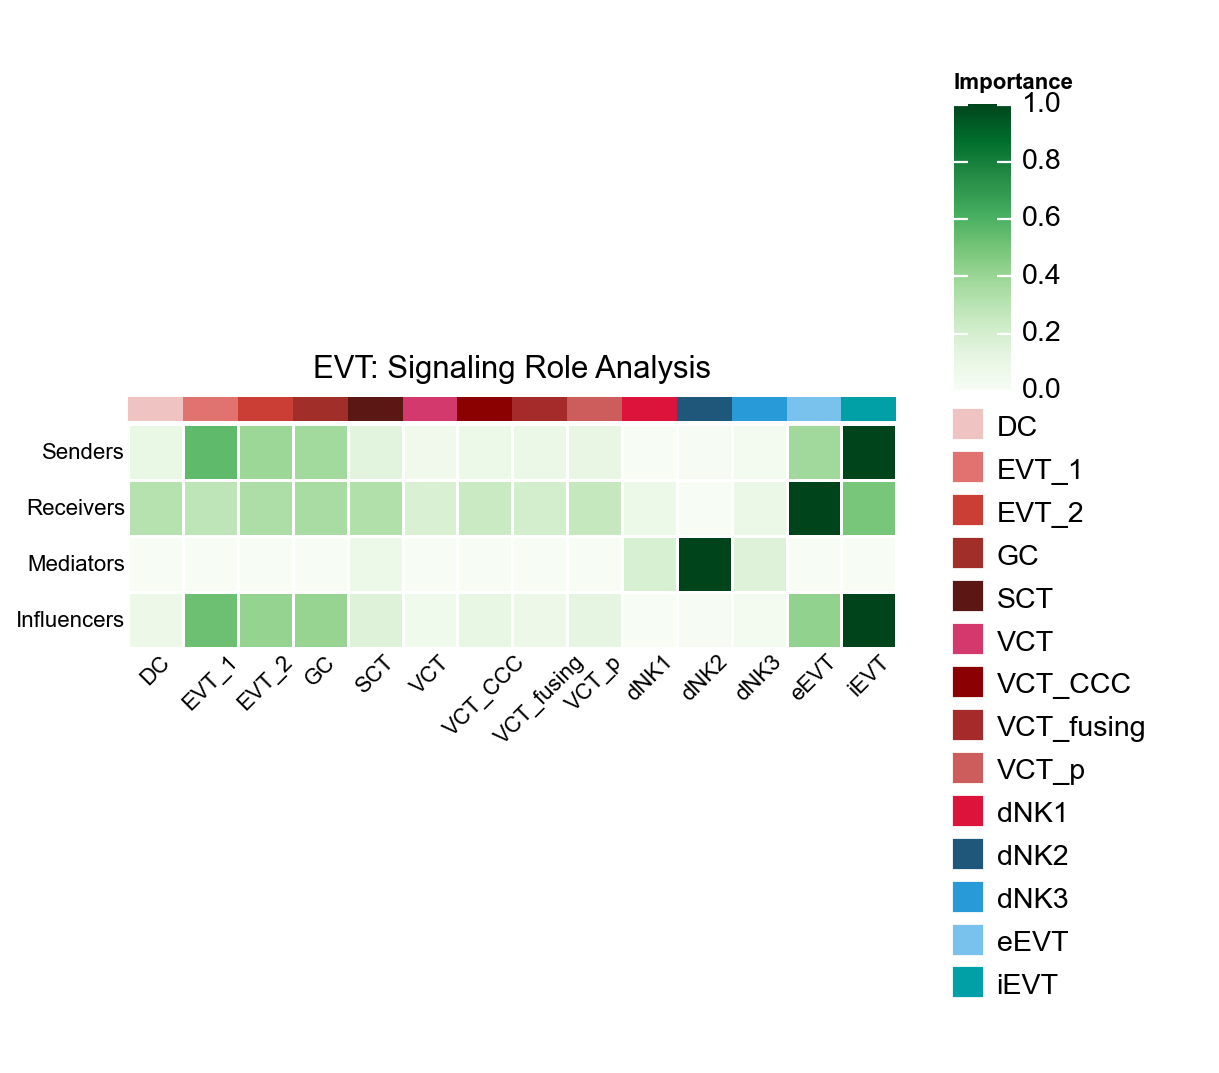

In [27]:
centrality_scores = viz.netAnalysis_computeCentrality()
viz.netAnalysis_signalingRole_network_marsilea(signaling=None, measures=None,
                                                  color_heatmap="Greens", 
                                                  width=8, height=2, font_size=10,
                                                  title="EVT: Signaling Role Analysis",
                                                  add_dendrogram=False, add_cell_colors=True,
                                                  add_importance_bars=False, show_values=False,
                                                  save=None)

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


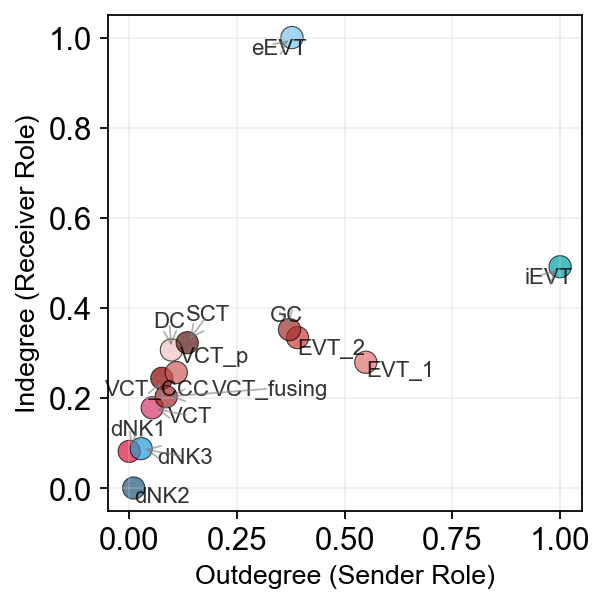

In [28]:
fig3, ax3 = viz.netAnalysis_signalingRole_scatter(
    signaling=None,
    x_measure='outdegree',
    y_measure='indegree',
    title="",
    figsize=(4,4)
)

✅ Network centrality calculation completed (CellChat-style Importance values)
   - Signaling pathways used: ['Signaling by Fibroblast growth factor']
   - Weight mode: Weighted
   - Calculated metrics: outdegree, indegree, flow_betweenness, information, overall
   - All centrality scores normalized to 0-1 range (Importance values)
📊 信号角色分析结果（Marsilea可视化，Importance值 0-1）:
   - Dominant Sender: eEVT (Importance: 1.000)
   - Dominant Receiver: iEVT (Importance: 1.000)
   - Influencer: eEVT (Importance: 1.000)


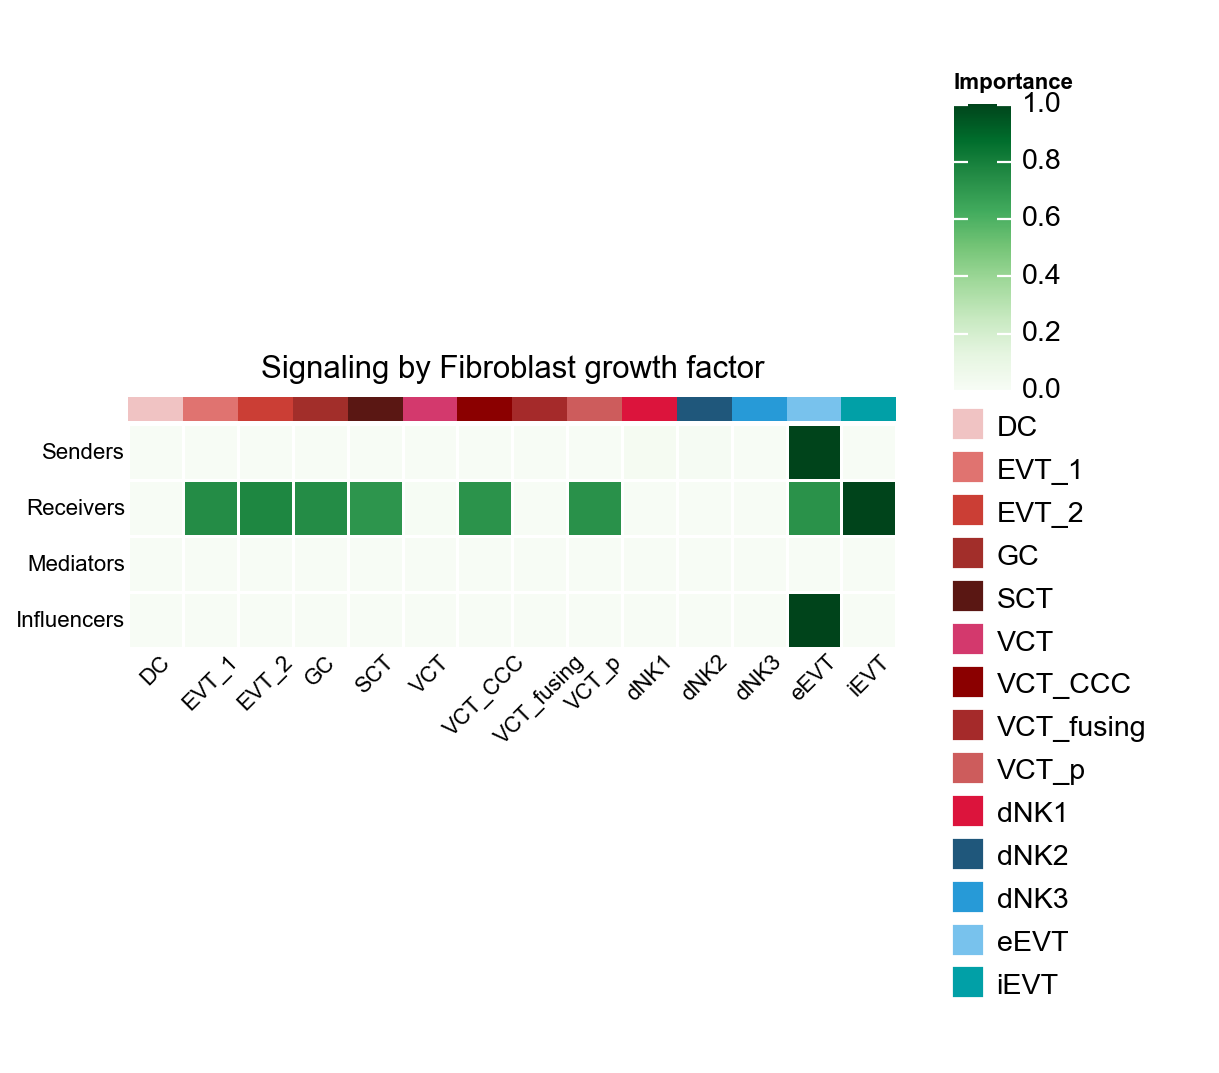

In [29]:
viz.netAnalysis_signalingRole_network_marsilea(signaling=['Signaling by Fibroblast growth factor'], measures=None,
                                                  color_heatmap="Greens", 
                                                  width=8, height=2, font_size=10,
                                                  title="Signaling by Fibroblast growth factor",
                                                  add_dendrogram=False, add_cell_colors=True,
                                                  add_importance_bars=False, show_values=False,
                                                  save=None)

✅ Network centrality calculation completed (CellChat-style Importance values)
   - Signaling pathways used: ['Signaling by Fibroblast growth factor']
   - Weight mode: Weighted
   - Calculated metrics: outdegree, indegree, flow_betweenness, information, overall
   - All centrality scores normalized to 0-1 range (Importance values)


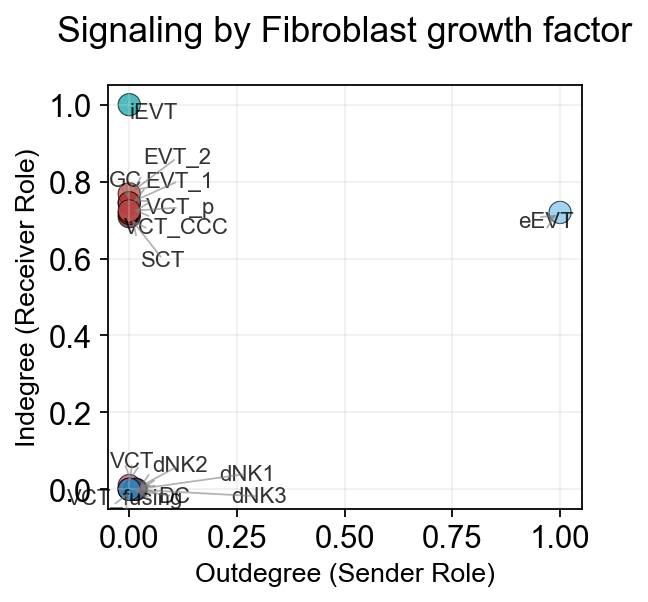

In [30]:
fig3, ax3 = viz.netAnalysis_signalingRole_scatter(
    signaling=['Signaling by Fibroblast growth factor'],
    x_measure='outdegree',
    y_measure='indegree',
    title="Signaling by Fibroblast growth factor",
    figsize=(4,4)
)

📊 Heatmap statistics:
   - Number of pathways: 11
   - Number of cell types: 14
   - Signal strength range: 0.103 - 73.498


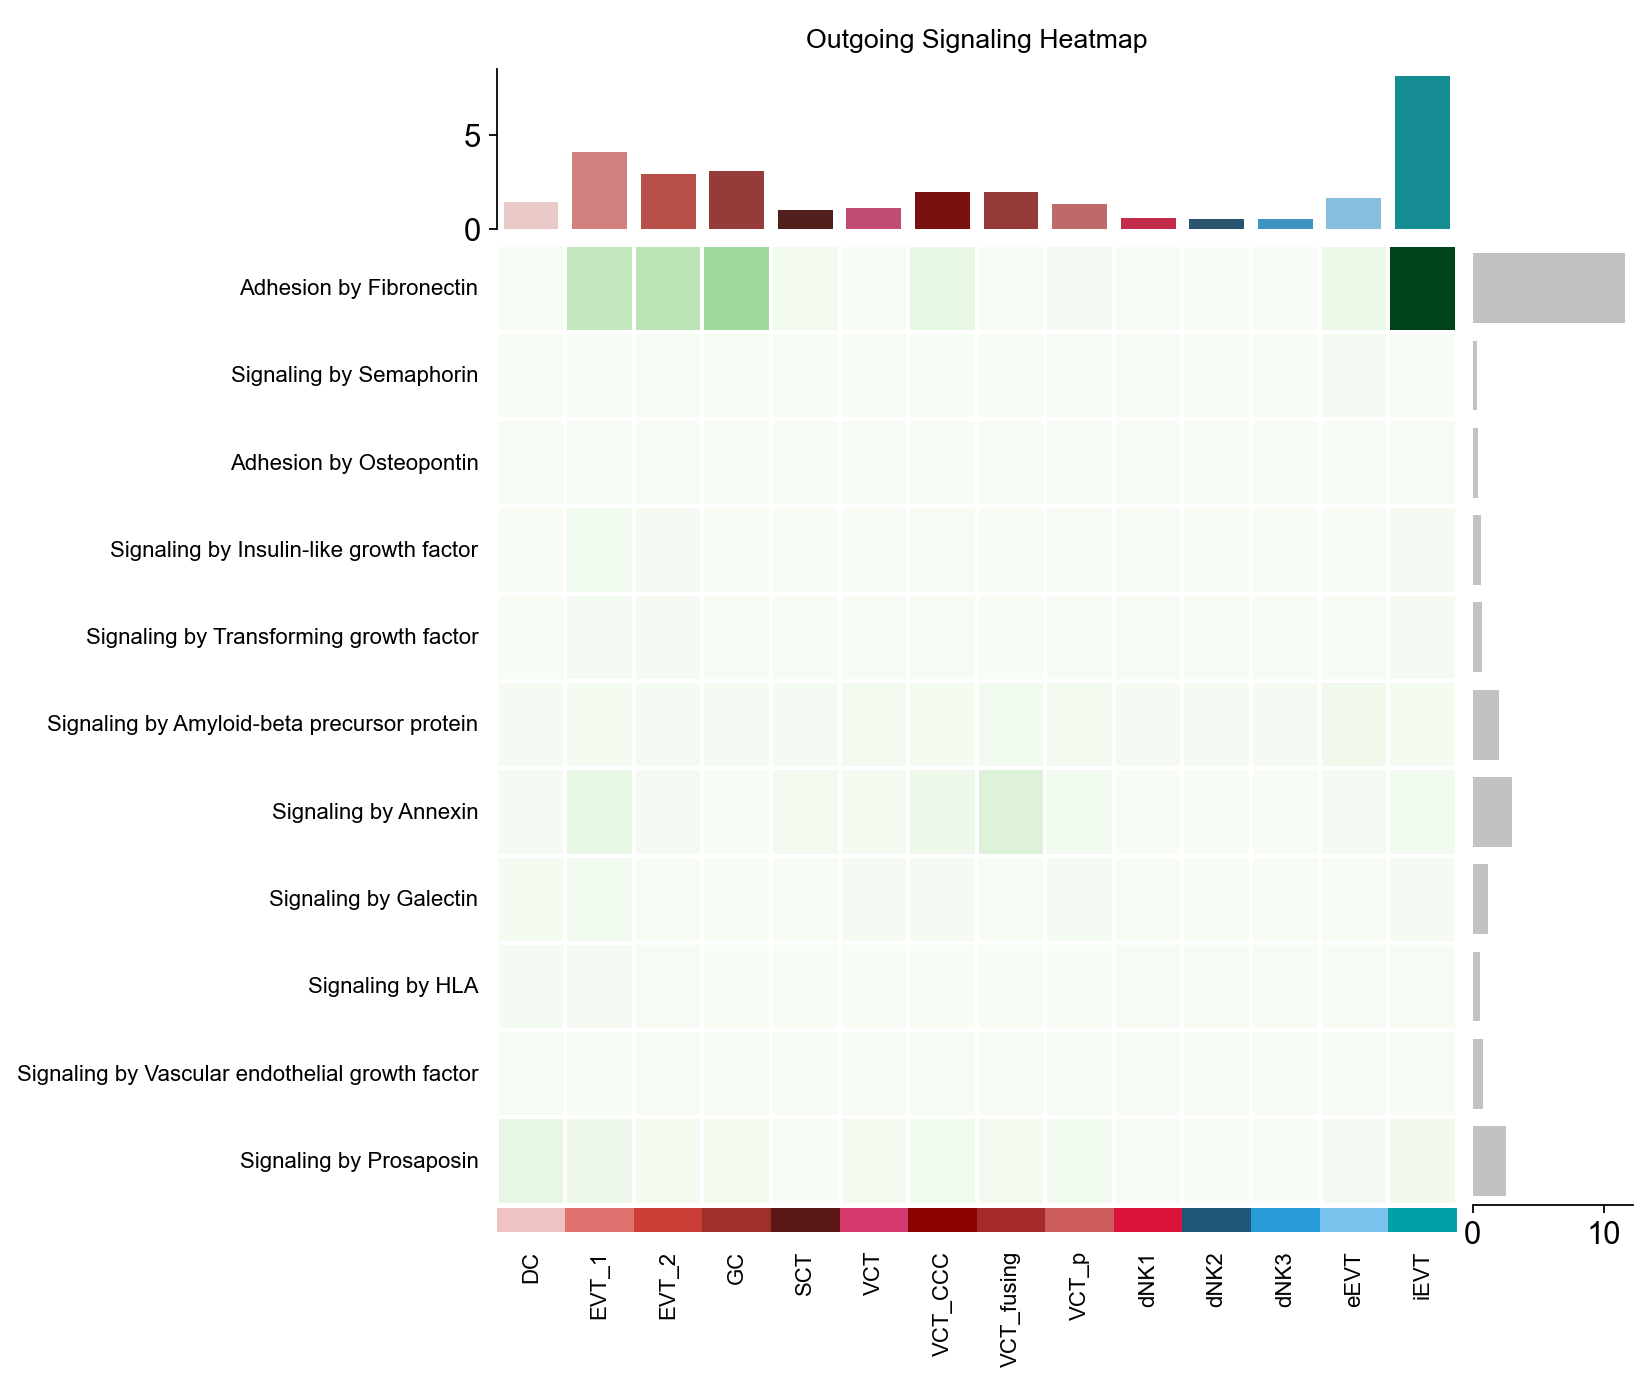

In [31]:
res=viz.netAnalysis_signalingRole_heatmap(pattern="outgoing", signaling=None, 
                                        row_scale=False, figsize=(6, 6), 
                                        cmap='Greens', show_totals=True,
                                        title=None, save=None)

📊 Heatmap statistics:
   - Number of pathways: 6
   - Number of cell types: 14
   - Signal strength range: 0.165 - 22.650


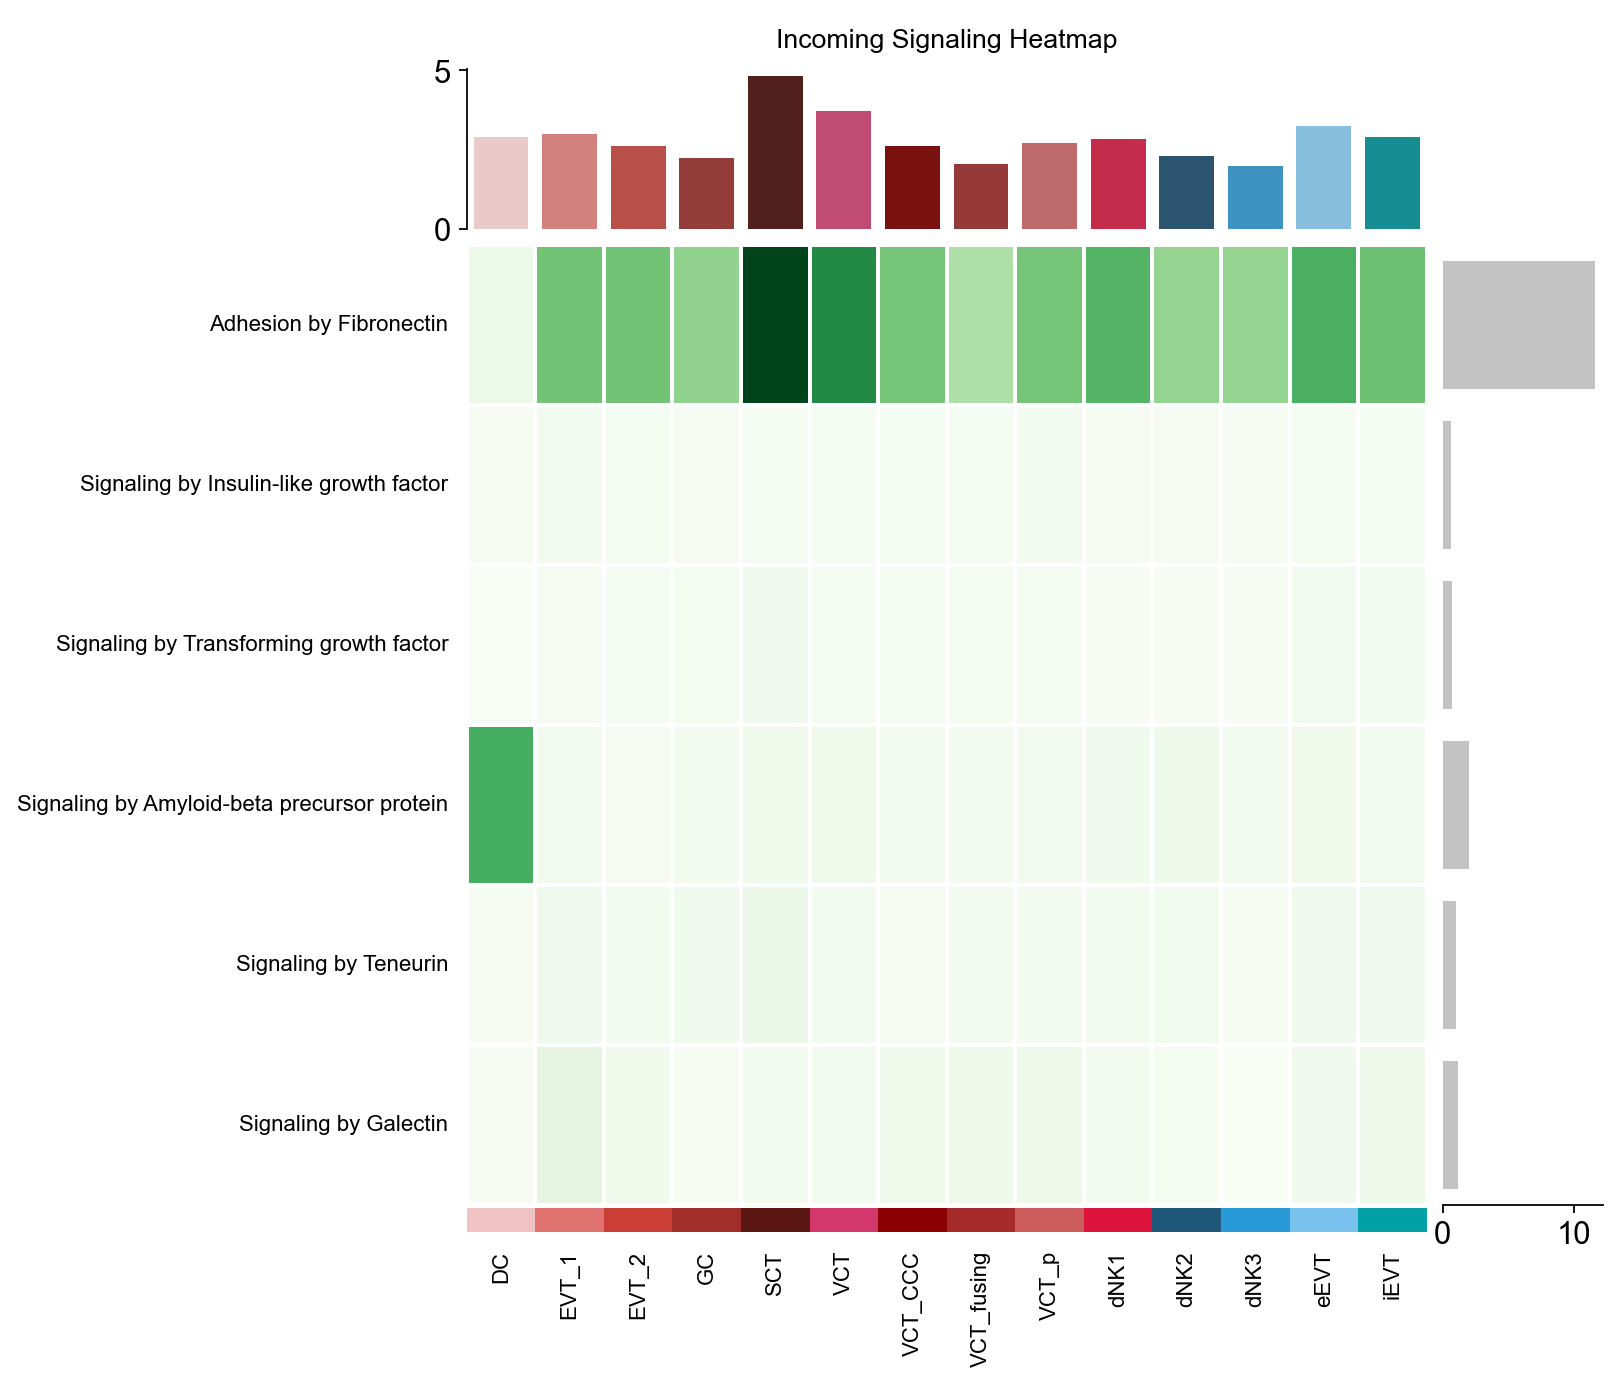

In [32]:
res=viz.netAnalysis_signalingRole_heatmap(pattern="incoming", signaling=None, 
                                        row_scale=False, figsize=(6, 6), 
                                        cmap='Greens', show_totals=True,
                                        title=None, save=None)

📊 Heatmap statistics:
   - Number of pathways: 1
   - Number of cell types: 14
   - Signal strength range: 0.165 - 2.851


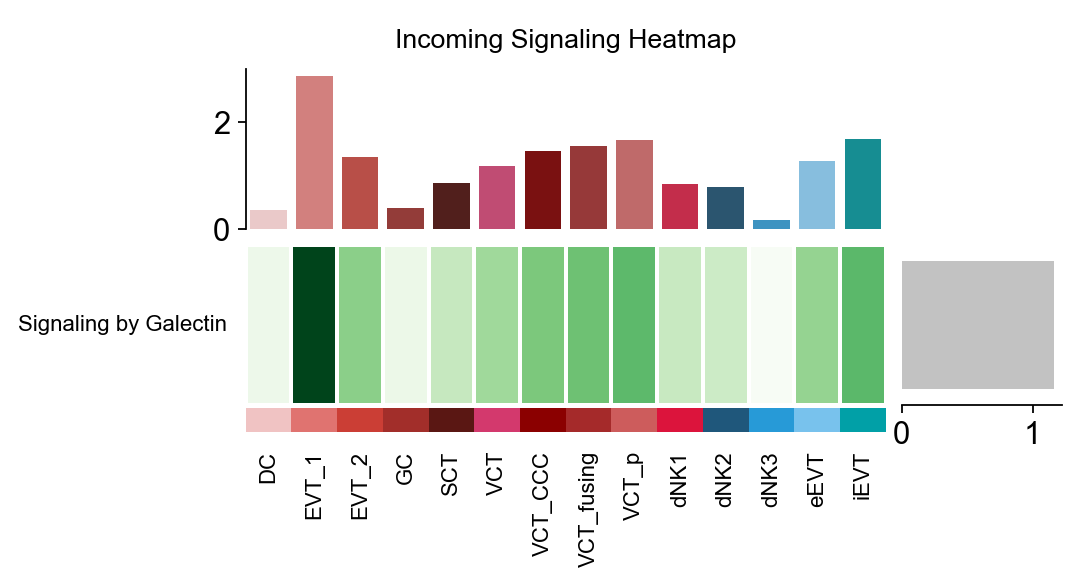

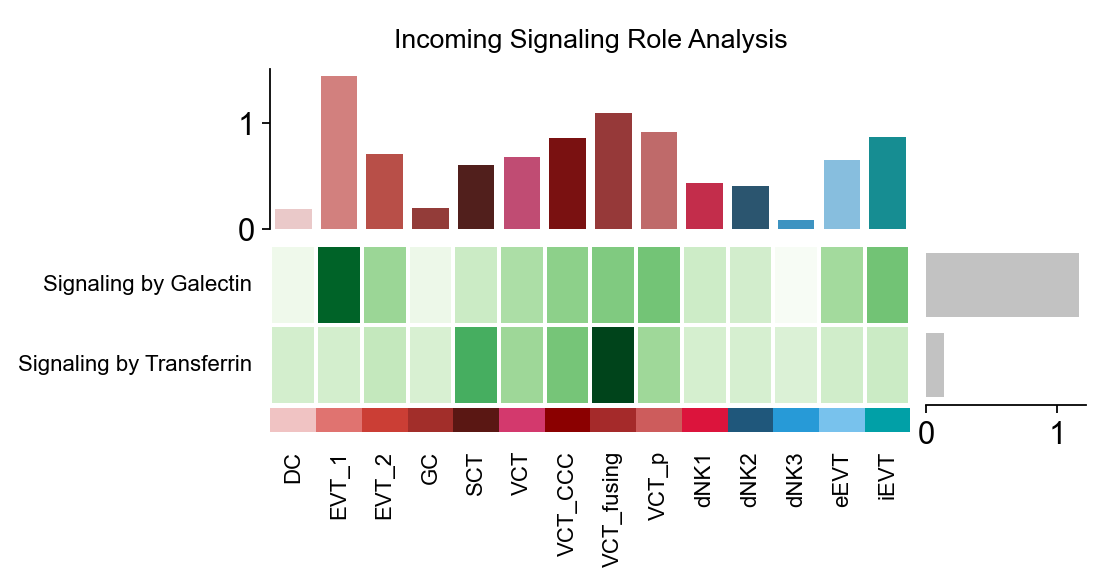

In [33]:
res=viz.netAnalysis_signalingRole_heatmap(pattern="incoming", 
                                          signaling=['Signaling by Galectin','Signaling by Transferrin'], 
                                        row_scale=True, figsize=(4, 1), 
                                        cmap='Greens', show_totals=True,
                                        title=None, save=None)

📊 Heatmap statistics:
   - Number of pathways: 1
   - Number of cell types: 14
   - Signal strength range: 0.132 - 3.115


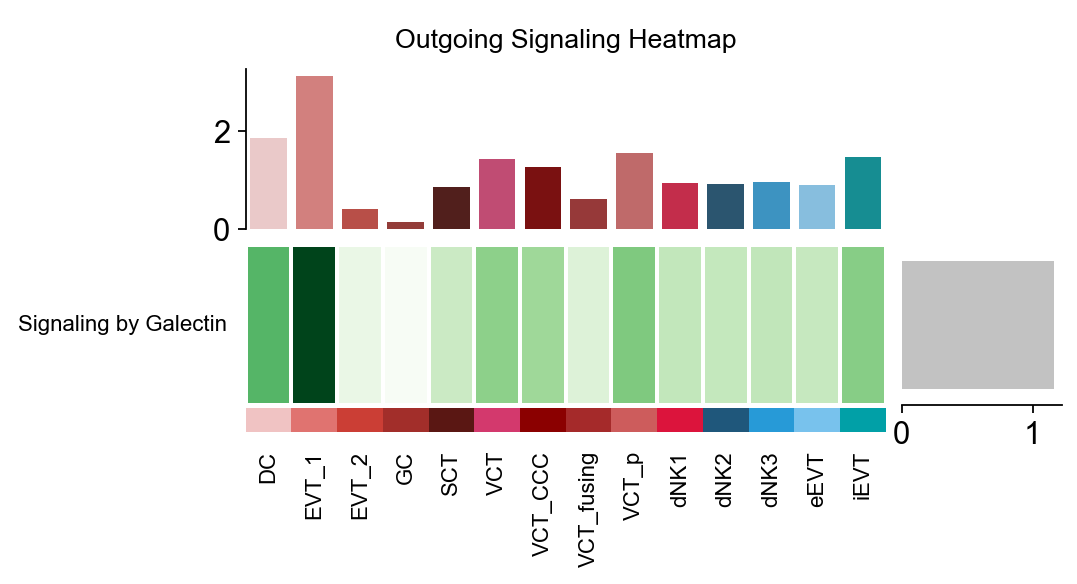

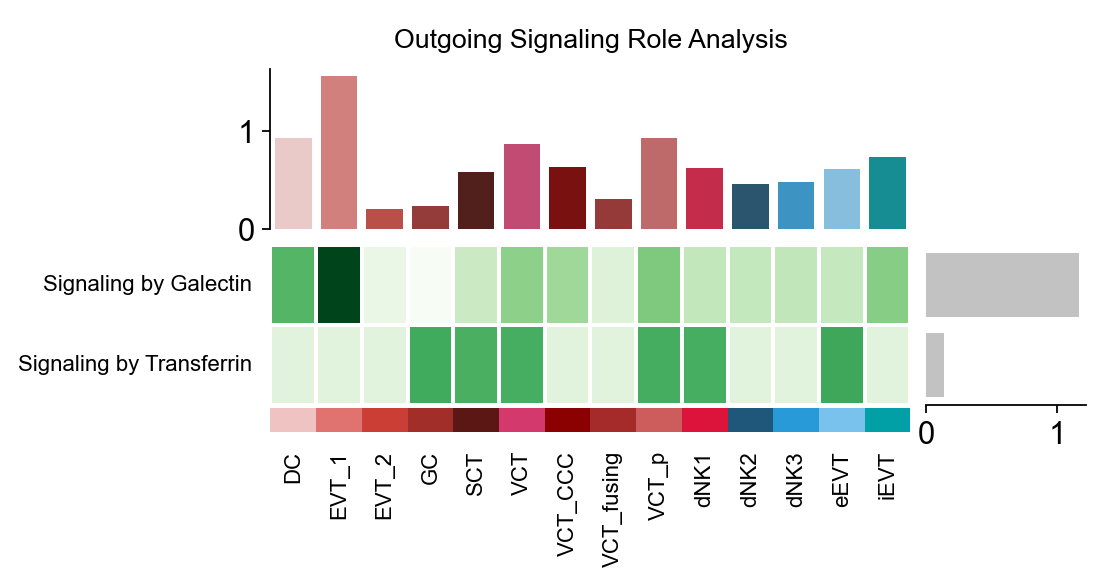

In [34]:
res=viz.netAnalysis_signalingRole_heatmap(pattern="outgoing", 
                                          signaling=['Signaling by Galectin','Signaling by Transferrin'], 
                                        row_scale=True, figsize=(4, 1), 
                                        cmap='Greens', show_totals=True,
                                        title=None, save=None)